In [1]:
import pandas as pd

season_2022 = pd.read_csv('season_2022.csv')
stats_20_21 = pd.read_csv('stats_20_21.csv')
stats_21_22 = pd.read_csv('stats_21_22.csv')

In [2]:
stats_20_21.describe()

,Unnamed: 0,UID,Height (cm),Weight (kg),birth_month,Born,Age_x,90s_x,Gls/90_x,SoT%_x,...,Short Cmp%_y,Medium Cmp/90_y,Medium Cmp%_y,Long Cmp/90_y,Long Cmp%_y,Ast/90_y,xAG/90_y,xA/90_y,KP/90_y,PrgP/90_y
count,3449.000000,3.449000e+03,3449.000000,3449.000000,3449.000000,3449.000000,3449.000000,3449.000000,3449.000000,3449.000000,...,3449.000000,3449.000000,3449.000000,3449.000000,3449.000000,3449.000000,3449.000000,3449.000000,3449.000000,3449.000000
mean,1724.000000,5.664633e+07,182.530879,76.440997,5.887214,1994.329951,25.401856,18.810844,0.116564,26.740360,...,86.137779,14.630061,82.302725,4.078692,55.669006,0.078310,0.082604,0.077127,0.785236,3.418220
std,995.784866,1.434576e+08,6.728773,7.169077,3.419658,4.216120,4.240898,9.948031,0.178527,19.331998,...,8.668419,7.916443,11.197514,2.695145,13.879401,0.108973,0.082457,0.074751,0.666366,2.102153
min,0.000000,1.113300e+04,159.000000,55.000000,1.000000,1978.000000,15.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,862.000000,1.935033e+07,178.000000,71.000000,3.000000,1991.000000,22.000000,10.900000,0.000000,12.500000,...,82.400000,8.890000,75.600000,2.070000,46.800000,0.000000,0.020000,0.020000,0.240000,2.000000
50%,1724.000000,4.313960e+07,183.000000,76.000000,6.000000,1995.000000,25.000000,18.800000,0.050000,27.800000,...,87.000000,13.900000,83.600000,3.720000,55.200000,0.040000,0.060000,0.060000,0.670000,3.260000
75%,2586.000000,6.729367e+07,187.000000,81.000000,9.000000,1997.000000,28.000000,26.800000,0.160000,38.400000,...,90.900000,19.110000,90.400000,5.660000,65.400000,0.120000,0.120000,0.110000,1.160000,4.720000
max,3448.000000,2.000109e+09,204.000000,106.000000,12.000000,2004.000000,42.000000,46.000000,1.820000,100.000000,...,100.000000,58.000000,100.000000,20.740000,100.000000,1.050000,0.790000,0.840000,4.290000,15.930000


In [3]:
#position subsets
mid_20_21 = stats_20_21[(stats_20_21['Position']=='Midfielder')  & (stats_20_21['90s_x']>=1) & (stats_20_21['90s_y']>=1)].reset_index(drop=True).drop(['Position','Unnamed: 0'],axis=1)
def_20_21 = stats_20_21[(stats_20_21['Position']=='Defender')  & (stats_20_21['90s_x']>=1) & (stats_20_21['90s_y']>=1)].reset_index(drop=True).drop(['Position','Unnamed: 0'],axis=1)
att_20_21 = stats_20_21[(stats_20_21['Position']=='Forward')  & (stats_20_21['90s_x']>=1) & (stats_20_21['90s_y']>=1)].reset_index(drop=True).drop(['Position','Unnamed: 0'],axis=1)

#subsets to predict KPI for
mid_21_22 = stats_21_22[(stats_21_22['Position']=='Midfielder') & (stats_21_22['90s_x']>=1) & (stats_21_22['90s_y']>=1)].reset_index(drop=True).drop(['Position','Unnamed: 0'],axis=1)
def_21_22 = stats_21_22[(stats_21_22['Position']=='Defender') & (stats_21_22['90s_x']>=1) & (stats_21_22['90s_y']>=1)].reset_index(drop=True).drop(['Position','Unnamed: 0'],axis=1)
att_21_22 = stats_21_22[(stats_21_22['Position']=='Forward') & (stats_21_22['90s_x']>=1) & (stats_21_22['90s_y']>=1)].reset_index(drop=True).drop(['Position','Unnamed: 0'],axis=1)

In [4]:
att_21_22 = att_21_22[att_21_22['UID'].isin(att_20_21['UID'])].reset_index(drop=True)
att_20_21 = att_20_21[att_20_21['UID'].isin(att_21_22['UID'])].reset_index(drop=True)

#targets for each position
target_mf = season_2022[season_2022['UID'].isin(mid_20_21['UID'])][['UID','Player','KP/90']].reset_index(drop=True)
target_df = season_2022[season_2022['UID'].isin(def_20_21['UID'])][['UID','Player','TklW/90']].reset_index(drop=True)
target_at = season_2022[season_2022['UID'].isin(att_20_21['UID'])][['UID','Player','SoT/90']].reset_index(drop=True)
att_20_21

,UID,Player,Nat,Preferred Foot,Height (cm),Weight (kg),birth_month,Born,Club,Age_x,...,Short Cmp%_y,Medium Cmp/90_y,Medium Cmp%_y,Long Cmp/90_y,Long Cmp%_y,Ast/90_y,xAG/90_y,xA/90_y,KP/90_y,PrgP/90_y
0,67142194,Abdón Prats,ESP,Right,180,76,12,1992,Mallorca,27,...,66.7,3.10,78.6,0.56,57.1,0.00,0.10,0.06,1.41,2.39
1,78020163,Abel Hernández,URU,Left,185,73,8,1990,At. San Luis,29,...,67.9,2.31,71.4,0.46,60.0,0.31,0.17,0.03,0.62,1.69
2,67245418,Abel Ruiz,ESP,Right,182,73,1,2000,BRG,20,...,88.8,4.87,79.8,0.65,62.5,0.19,0.16,0.08,1.17,1.88
3,85145202,Aboubakary Kanté,GAM,Right Only,181,80,8,1994,Huesca,25,...,78.3,2.65,79.6,0.27,80.0,0.00,0.04,0.04,0.48,0.82
4,72048195,Abu Danladi,GHA,Right Only,178,78,10,1995,Minnesota,24,...,76.5,10.91,85.7,0.91,25.0,0.00,0.18,0.27,2.73,3.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
670,1501655,Álvaro Negredo,ESP,Left,186,86,8,1985,Cádiz,34,...,67.1,3.62,59.2,1.83,64.7,0.08,0.11,0.12,0.92,2.08
671,14043349,Ángel Correa,ARG,Right,172,67,3,1995,A. Madrid,25,...,85.0,4.71,66.4,0.83,40.5,0.24,0.18,0.18,1.21,3.16
672,14000219,Ángel Di María,ARG,Left,180,75,2,1988,Juventus,32,...,86.3,15.14,75.9,4.59,53.5,0.38,0.38,0.42,2.95,6.12
673,51011101,Ángel Sepúlveda,MEX,Right,180,77,2,1991,Querétaro,29,...,75.6,4.34,67.0,1.17,77.3,0.00,0.13,0.09,1.10,2.21


## Attackers

In [5]:
#just for attackers
from sklearn.model_selection import train_test_split

X = att_20_21
y = target_at

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

new_X_train = X_train.drop(['UID','Player','Club','Nat'], axis = 1)
new_X_test = X_test.drop(['UID','Player','Club','Nat'], axis = 1)
new_y_train = y_train.drop(['UID','Player'], axis = 1)
new_y_test = y_test.drop(['UID','Player'], axis = 1)

In [6]:
import category_encoders as ce

# Create the target encoder
target_encoder = ce.TargetEncoder()

#Encode object columns using target encoding
enc_x_train = target_encoder.fit_transform(new_X_train, new_y_train)
enc_x_test = target_encoder.transform(new_X_test)

In [7]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Standardize the data
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(enc_x_train), columns=enc_x_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(enc_x_test), columns=enc_x_test.columns)

# Define the hyperparameter grid
param_grid = {
    'learning_rate': [.005,0.01,0.05],
    'early_stopping_rounds': [10],
    'max_depth': [2,3,5]
}

# Create the XGBoost model object
xgb_model = XGBRegressor()

# Create the GridSearchCV object
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_scaled, new_y_train,eval_set=[(X_train_scaled, new_y_train), (X_test_scaled, new_y_test)])

# Print the best set of hyperparameters and the corresponding score
print("Best set of hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

[0]	validation_0-rmse:0.41669	validation_1-rmse:0.36490
[1]	validation_0-rmse:0.41630	validation_1-rmse:0.36469
[2]	validation_0-rmse:0.41592	validation_1-rmse:0.36448
[3]	validation_0-rmse:0.41553	validation_1-rmse:0.36427
[4]	validation_0-rmse:0.41515	validation_1-rmse:0.36407
[5]	validation_0-rmse:0.41478	validation_1-rmse:0.36387
[6]	validation_0-rmse:0.41440	validation_1-rmse:0.36368
[7]	validation_0-rmse:0.41403	validation_1-rmse:0.36339
[8]	validation_0-rmse:0.41366	validation_1-rmse:0.36321
[9]	validation_0-rmse:0.41329	validation_1-rmse:0.36293
[10]	validation_0-rmse:0.41293	validation_1-rmse:0.36275
[11]	validation_0-rmse:0.41257	validation_1-rmse:0.36248
[12]	validation_0-rmse:0.41222	validation_1-rmse:0.36231
[13]	validation_0-rmse:0.41186	validation_1-rmse:0.36205
[14]	validation_0-rmse:0.41151	validation_1-rmse:0.36188
[15]	validation_0-rmse:0.41116	validation_1-rmse:0.36162
[16]	validation_0-rmse:0.41082	validation_1-rmse:0.36146
[17]	validation_0-rmse:0.41047	validation

[45]	validation_0-rmse:0.40302	validation_1-rmse:0.35340
[46]	validation_0-rmse:0.40278	validation_1-rmse:0.35325
[47]	validation_0-rmse:0.40252	validation_1-rmse:0.35307
[48]	validation_0-rmse:0.40221	validation_1-rmse:0.35293
[49]	validation_0-rmse:0.40199	validation_1-rmse:0.35276
[50]	validation_0-rmse:0.40175	validation_1-rmse:0.35261
[51]	validation_0-rmse:0.40144	validation_1-rmse:0.35248
[52]	validation_0-rmse:0.40119	validation_1-rmse:0.35234
[53]	validation_0-rmse:0.40088	validation_1-rmse:0.35220
[54]	validation_0-rmse:0.40065	validation_1-rmse:0.35205
[55]	validation_0-rmse:0.40043	validation_1-rmse:0.35188
[56]	validation_0-rmse:0.40013	validation_1-rmse:0.35176
[57]	validation_0-rmse:0.39989	validation_1-rmse:0.35162
[58]	validation_0-rmse:0.39966	validation_1-rmse:0.35148
[59]	validation_0-rmse:0.39936	validation_1-rmse:0.35136
[60]	validation_0-rmse:0.39915	validation_1-rmse:0.35119
[61]	validation_0-rmse:0.39886	validation_1-rmse:0.35108
[62]	validation_0-rmse:0.39862	

[89]	validation_0-rmse:0.39206	validation_1-rmse:0.34724
[90]	validation_0-rmse:0.39187	validation_1-rmse:0.34712
[91]	validation_0-rmse:0.39166	validation_1-rmse:0.34709
[92]	validation_0-rmse:0.39147	validation_1-rmse:0.34701
[93]	validation_0-rmse:0.39126	validation_1-rmse:0.34685
[94]	validation_0-rmse:0.39106	validation_1-rmse:0.34677
[95]	validation_0-rmse:0.39087	validation_1-rmse:0.34666
[96]	validation_0-rmse:0.39067	validation_1-rmse:0.34663
[97]	validation_0-rmse:0.39047	validation_1-rmse:0.34655
[98]	validation_0-rmse:0.39028	validation_1-rmse:0.34643
[99]	validation_0-rmse:0.39008	validation_1-rmse:0.34641
[0]	validation_0-rmse:0.41651	validation_1-rmse:0.36244
[1]	validation_0-rmse:0.41611	validation_1-rmse:0.36221
[2]	validation_0-rmse:0.41572	validation_1-rmse:0.36193
[3]	validation_0-rmse:0.41533	validation_1-rmse:0.36170
[4]	validation_0-rmse:0.41496	validation_1-rmse:0.36143
[5]	validation_0-rmse:0.41458	validation_1-rmse:0.36125
[6]	validation_0-rmse:0.41420	validat

[34]	validation_0-rmse:0.40377	validation_1-rmse:0.35454
[35]	validation_0-rmse:0.40344	validation_1-rmse:0.35435
[36]	validation_0-rmse:0.40314	validation_1-rmse:0.35415
[37]	validation_0-rmse:0.40281	validation_1-rmse:0.35397
[38]	validation_0-rmse:0.40253	validation_1-rmse:0.35384
[39]	validation_0-rmse:0.40221	validation_1-rmse:0.35366
[40]	validation_0-rmse:0.40193	validation_1-rmse:0.35353
[41]	validation_0-rmse:0.40161	validation_1-rmse:0.35335
[42]	validation_0-rmse:0.40133	validation_1-rmse:0.35317
[43]	validation_0-rmse:0.40101	validation_1-rmse:0.35299
[44]	validation_0-rmse:0.40073	validation_1-rmse:0.35280
[45]	validation_0-rmse:0.40042	validation_1-rmse:0.35263
[46]	validation_0-rmse:0.40014	validation_1-rmse:0.35245
[47]	validation_0-rmse:0.39984	validation_1-rmse:0.35228
[48]	validation_0-rmse:0.39957	validation_1-rmse:0.35217
[49]	validation_0-rmse:0.39927	validation_1-rmse:0.35200
[50]	validation_0-rmse:0.39897	validation_1-rmse:0.35178
[51]	validation_0-rmse:0.39872	

[78]	validation_0-rmse:0.38464	validation_1-rmse:0.35308
[79]	validation_0-rmse:0.38431	validation_1-rmse:0.35304
[80]	validation_0-rmse:0.38400	validation_1-rmse:0.35289
[81]	validation_0-rmse:0.38371	validation_1-rmse:0.35287
[82]	validation_0-rmse:0.38342	validation_1-rmse:0.35279
[83]	validation_0-rmse:0.38312	validation_1-rmse:0.35269
[84]	validation_0-rmse:0.38283	validation_1-rmse:0.35264
[85]	validation_0-rmse:0.38253	validation_1-rmse:0.35253
[86]	validation_0-rmse:0.38225	validation_1-rmse:0.35239
[87]	validation_0-rmse:0.38194	validation_1-rmse:0.35237
[88]	validation_0-rmse:0.38164	validation_1-rmse:0.35227
[89]	validation_0-rmse:0.38134	validation_1-rmse:0.35224
[90]	validation_0-rmse:0.38104	validation_1-rmse:0.35222
[91]	validation_0-rmse:0.38075	validation_1-rmse:0.35211
[92]	validation_0-rmse:0.38047	validation_1-rmse:0.35198
[93]	validation_0-rmse:0.38018	validation_1-rmse:0.35199
[94]	validation_0-rmse:0.37989	validation_1-rmse:0.35190
[95]	validation_0-rmse:0.37960	

[23]	validation_0-rmse:0.40610	validation_1-rmse:0.35569
[24]	validation_0-rmse:0.40569	validation_1-rmse:0.35547
[25]	validation_0-rmse:0.40531	validation_1-rmse:0.35524
[26]	validation_0-rmse:0.40492	validation_1-rmse:0.35503
[27]	validation_0-rmse:0.40454	validation_1-rmse:0.35478
[28]	validation_0-rmse:0.40415	validation_1-rmse:0.35457
[29]	validation_0-rmse:0.40378	validation_1-rmse:0.35435
[30]	validation_0-rmse:0.40340	validation_1-rmse:0.35415
[31]	validation_0-rmse:0.40302	validation_1-rmse:0.35391
[32]	validation_0-rmse:0.40264	validation_1-rmse:0.35370
[33]	validation_0-rmse:0.40226	validation_1-rmse:0.35341
[34]	validation_0-rmse:0.40189	validation_1-rmse:0.35319
[35]	validation_0-rmse:0.40151	validation_1-rmse:0.35299
[36]	validation_0-rmse:0.40115	validation_1-rmse:0.35271
[37]	validation_0-rmse:0.40079	validation_1-rmse:0.35255
[38]	validation_0-rmse:0.40042	validation_1-rmse:0.35226
[39]	validation_0-rmse:0.40006	validation_1-rmse:0.35204
[40]	validation_0-rmse:0.39971	

[67]	validation_0-rmse:0.38804	validation_1-rmse:0.35058
[68]	validation_0-rmse:0.38769	validation_1-rmse:0.35053
[69]	validation_0-rmse:0.38739	validation_1-rmse:0.35034
[70]	validation_0-rmse:0.38703	validation_1-rmse:0.35023
[71]	validation_0-rmse:0.38668	validation_1-rmse:0.35018
[72]	validation_0-rmse:0.38636	validation_1-rmse:0.34998
[73]	validation_0-rmse:0.38601	validation_1-rmse:0.34990
[74]	validation_0-rmse:0.38566	validation_1-rmse:0.34985
[75]	validation_0-rmse:0.38531	validation_1-rmse:0.34975
[76]	validation_0-rmse:0.38500	validation_1-rmse:0.34956
[77]	validation_0-rmse:0.38465	validation_1-rmse:0.34950
[78]	validation_0-rmse:0.38432	validation_1-rmse:0.34943
[79]	validation_0-rmse:0.38399	validation_1-rmse:0.34941
[80]	validation_0-rmse:0.38368	validation_1-rmse:0.34922
[81]	validation_0-rmse:0.38335	validation_1-rmse:0.34918
[82]	validation_0-rmse:0.38303	validation_1-rmse:0.34916
[83]	validation_0-rmse:0.38271	validation_1-rmse:0.34908
[84]	validation_0-rmse:0.38241	

[12]	validation_0-rmse:0.40653	validation_1-rmse:0.36078
[13]	validation_0-rmse:0.40577	validation_1-rmse:0.36049
[14]	validation_0-rmse:0.40500	validation_1-rmse:0.36022
[15]	validation_0-rmse:0.40424	validation_1-rmse:0.35993
[16]	validation_0-rmse:0.40348	validation_1-rmse:0.35969
[17]	validation_0-rmse:0.40272	validation_1-rmse:0.35945
[18]	validation_0-rmse:0.40196	validation_1-rmse:0.35926
[19]	validation_0-rmse:0.40121	validation_1-rmse:0.35905
[20]	validation_0-rmse:0.40046	validation_1-rmse:0.35884
[21]	validation_0-rmse:0.39972	validation_1-rmse:0.35861
[22]	validation_0-rmse:0.39898	validation_1-rmse:0.35839
[23]	validation_0-rmse:0.39823	validation_1-rmse:0.35820
[24]	validation_0-rmse:0.39750	validation_1-rmse:0.35805
[25]	validation_0-rmse:0.39677	validation_1-rmse:0.35788
[26]	validation_0-rmse:0.39605	validation_1-rmse:0.35769
[27]	validation_0-rmse:0.39533	validation_1-rmse:0.35755
[28]	validation_0-rmse:0.39459	validation_1-rmse:0.35746
[29]	validation_0-rmse:0.39390	

[81]	validation_0-rmse:0.35820	validation_1-rmse:0.35107
[82]	validation_0-rmse:0.35765	validation_1-rmse:0.35099
[83]	validation_0-rmse:0.35698	validation_1-rmse:0.35082
[84]	validation_0-rmse:0.35641	validation_1-rmse:0.35066
[85]	validation_0-rmse:0.35584	validation_1-rmse:0.35053
[86]	validation_0-rmse:0.35526	validation_1-rmse:0.35037
[87]	validation_0-rmse:0.35464	validation_1-rmse:0.35026
[88]	validation_0-rmse:0.35408	validation_1-rmse:0.35015
[89]	validation_0-rmse:0.35360	validation_1-rmse:0.34997
[90]	validation_0-rmse:0.35294	validation_1-rmse:0.34986
[91]	validation_0-rmse:0.35230	validation_1-rmse:0.34980
[92]	validation_0-rmse:0.35176	validation_1-rmse:0.34992
[93]	validation_0-rmse:0.35121	validation_1-rmse:0.34976
[94]	validation_0-rmse:0.35061	validation_1-rmse:0.34967
[95]	validation_0-rmse:0.34999	validation_1-rmse:0.34959
[96]	validation_0-rmse:0.34944	validation_1-rmse:0.34948
[97]	validation_0-rmse:0.34881	validation_1-rmse:0.34939
[98]	validation_0-rmse:0.34828	

[26]	validation_0-rmse:0.39382	validation_1-rmse:0.35544
[27]	validation_0-rmse:0.39310	validation_1-rmse:0.35517
[28]	validation_0-rmse:0.39225	validation_1-rmse:0.35501
[29]	validation_0-rmse:0.39154	validation_1-rmse:0.35476
[30]	validation_0-rmse:0.39071	validation_1-rmse:0.35461
[31]	validation_0-rmse:0.38999	validation_1-rmse:0.35439
[32]	validation_0-rmse:0.38929	validation_1-rmse:0.35415
[33]	validation_0-rmse:0.38848	validation_1-rmse:0.35401
[34]	validation_0-rmse:0.38777	validation_1-rmse:0.35379
[35]	validation_0-rmse:0.38696	validation_1-rmse:0.35362
[36]	validation_0-rmse:0.38627	validation_1-rmse:0.35343
[37]	validation_0-rmse:0.38547	validation_1-rmse:0.35329
[38]	validation_0-rmse:0.38478	validation_1-rmse:0.35310
[39]	validation_0-rmse:0.38406	validation_1-rmse:0.35297
[40]	validation_0-rmse:0.38328	validation_1-rmse:0.35285
[41]	validation_0-rmse:0.38251	validation_1-rmse:0.35268
[42]	validation_0-rmse:0.38184	validation_1-rmse:0.35251
[43]	validation_0-rmse:0.38118	

[83]	validation_0-rmse:0.35707	validation_1-rmse:0.34810
[84]	validation_0-rmse:0.35648	validation_1-rmse:0.34796
[85]	validation_0-rmse:0.35589	validation_1-rmse:0.34784
[86]	validation_0-rmse:0.35527	validation_1-rmse:0.34772
[87]	validation_0-rmse:0.35471	validation_1-rmse:0.34763
[88]	validation_0-rmse:0.35417	validation_1-rmse:0.34751
[89]	validation_0-rmse:0.35359	validation_1-rmse:0.34736
[90]	validation_0-rmse:0.35297	validation_1-rmse:0.34729
[91]	validation_0-rmse:0.35243	validation_1-rmse:0.34717
[92]	validation_0-rmse:0.35184	validation_1-rmse:0.34710
[93]	validation_0-rmse:0.35129	validation_1-rmse:0.34701
[94]	validation_0-rmse:0.35080	validation_1-rmse:0.34695
[95]	validation_0-rmse:0.35019	validation_1-rmse:0.34690
[96]	validation_0-rmse:0.34961	validation_1-rmse:0.34681
[97]	validation_0-rmse:0.34900	validation_1-rmse:0.34677
[98]	validation_0-rmse:0.34842	validation_1-rmse:0.34664
[99]	validation_0-rmse:0.34791	validation_1-rmse:0.34648
[0]	validation_0-rmse:0.41630	v

[28]	validation_0-rmse:0.39981	validation_1-rmse:0.35149
[29]	validation_0-rmse:0.39939	validation_1-rmse:0.35116
[30]	validation_0-rmse:0.39891	validation_1-rmse:0.35084
[31]	validation_0-rmse:0.39846	validation_1-rmse:0.35057
[32]	validation_0-rmse:0.39788	validation_1-rmse:0.35034
[33]	validation_0-rmse:0.39745	validation_1-rmse:0.35005
[34]	validation_0-rmse:0.39689	validation_1-rmse:0.34983
[35]	validation_0-rmse:0.39643	validation_1-rmse:0.34959
[36]	validation_0-rmse:0.39588	validation_1-rmse:0.34938
[37]	validation_0-rmse:0.39546	validation_1-rmse:0.34911
[38]	validation_0-rmse:0.39506	validation_1-rmse:0.34890
[39]	validation_0-rmse:0.39453	validation_1-rmse:0.34871
[40]	validation_0-rmse:0.39408	validation_1-rmse:0.34857
[41]	validation_0-rmse:0.39359	validation_1-rmse:0.34838
[42]	validation_0-rmse:0.39322	validation_1-rmse:0.34810
[43]	validation_0-rmse:0.39279	validation_1-rmse:0.34792
[44]	validation_0-rmse:0.39228	validation_1-rmse:0.34775
[45]	validation_0-rmse:0.39190	

[72]	validation_0-rmse:0.38201	validation_1-rmse:0.34356
[73]	validation_0-rmse:0.38170	validation_1-rmse:0.34344
[74]	validation_0-rmse:0.38142	validation_1-rmse:0.34341
[75]	validation_0-rmse:0.38112	validation_1-rmse:0.34329
[76]	validation_0-rmse:0.38085	validation_1-rmse:0.34314
[77]	validation_0-rmse:0.38054	validation_1-rmse:0.34305
[78]	validation_0-rmse:0.38028	validation_1-rmse:0.34303
[79]	validation_0-rmse:0.37995	validation_1-rmse:0.34283
[80]	validation_0-rmse:0.37965	validation_1-rmse:0.34274
[81]	validation_0-rmse:0.37937	validation_1-rmse:0.34277
[82]	validation_0-rmse:0.37911	validation_1-rmse:0.34263
[83]	validation_0-rmse:0.37881	validation_1-rmse:0.34253
[84]	validation_0-rmse:0.37850	validation_1-rmse:0.34236
[85]	validation_0-rmse:0.37825	validation_1-rmse:0.34236
[86]	validation_0-rmse:0.37800	validation_1-rmse:0.34229
[87]	validation_0-rmse:0.37767	validation_1-rmse:0.34219
[88]	validation_0-rmse:0.37738	validation_1-rmse:0.34214
[89]	validation_0-rmse:0.37713	

[17]	validation_0-rmse:0.40343	validation_1-rmse:0.35436
[18]	validation_0-rmse:0.40278	validation_1-rmse:0.35398
[19]	validation_0-rmse:0.40222	validation_1-rmse:0.35372
[20]	validation_0-rmse:0.40158	validation_1-rmse:0.35336
[21]	validation_0-rmse:0.40096	validation_1-rmse:0.35301
[22]	validation_0-rmse:0.40042	validation_1-rmse:0.35277
[23]	validation_0-rmse:0.39981	validation_1-rmse:0.35243
[24]	validation_0-rmse:0.39925	validation_1-rmse:0.35208
[25]	validation_0-rmse:0.39866	validation_1-rmse:0.35176
[26]	validation_0-rmse:0.39811	validation_1-rmse:0.35139
[27]	validation_0-rmse:0.39754	validation_1-rmse:0.35108
[28]	validation_0-rmse:0.39701	validation_1-rmse:0.35075
[29]	validation_0-rmse:0.39645	validation_1-rmse:0.35046
[30]	validation_0-rmse:0.39596	validation_1-rmse:0.35026
[31]	validation_0-rmse:0.39542	validation_1-rmse:0.34998
[32]	validation_0-rmse:0.39496	validation_1-rmse:0.34955
[33]	validation_0-rmse:0.39443	validation_1-rmse:0.34929
[34]	validation_0-rmse:0.39391	

[61]	validation_0-rmse:0.37185	validation_1-rmse:0.34941
[62]	validation_0-rmse:0.37138	validation_1-rmse:0.34929
[63]	validation_0-rmse:0.37088	validation_1-rmse:0.34906
[64]	validation_0-rmse:0.37036	validation_1-rmse:0.34897
[65]	validation_0-rmse:0.36984	validation_1-rmse:0.34884
[66]	validation_0-rmse:0.36935	validation_1-rmse:0.34876
[67]	validation_0-rmse:0.36885	validation_1-rmse:0.34868
[68]	validation_0-rmse:0.36836	validation_1-rmse:0.34846
[69]	validation_0-rmse:0.36790	validation_1-rmse:0.34839
[70]	validation_0-rmse:0.36743	validation_1-rmse:0.34818
[71]	validation_0-rmse:0.36695	validation_1-rmse:0.34809
[72]	validation_0-rmse:0.36647	validation_1-rmse:0.34802
[73]	validation_0-rmse:0.36600	validation_1-rmse:0.34795
[74]	validation_0-rmse:0.36556	validation_1-rmse:0.34790
[75]	validation_0-rmse:0.36514	validation_1-rmse:0.34776
[76]	validation_0-rmse:0.36469	validation_1-rmse:0.34765
[77]	validation_0-rmse:0.36425	validation_1-rmse:0.34751
[78]	validation_0-rmse:0.36380	

[5]	validation_0-rmse:0.41110	validation_1-rmse:0.35906
[6]	validation_0-rmse:0.41025	validation_1-rmse:0.35853
[7]	validation_0-rmse:0.40937	validation_1-rmse:0.35788
[8]	validation_0-rmse:0.40854	validation_1-rmse:0.35729
[9]	validation_0-rmse:0.40769	validation_1-rmse:0.35667
[10]	validation_0-rmse:0.40687	validation_1-rmse:0.35611
[11]	validation_0-rmse:0.40607	validation_1-rmse:0.35560
[12]	validation_0-rmse:0.40527	validation_1-rmse:0.35515
[13]	validation_0-rmse:0.40449	validation_1-rmse:0.35454
[14]	validation_0-rmse:0.40373	validation_1-rmse:0.35409
[15]	validation_0-rmse:0.40298	validation_1-rmse:0.35359
[16]	validation_0-rmse:0.40221	validation_1-rmse:0.35318
[17]	validation_0-rmse:0.40149	validation_1-rmse:0.35278
[18]	validation_0-rmse:0.40075	validation_1-rmse:0.35240
[19]	validation_0-rmse:0.40002	validation_1-rmse:0.35205
[20]	validation_0-rmse:0.39932	validation_1-rmse:0.35159
[21]	validation_0-rmse:0.39861	validation_1-rmse:0.35123
[22]	validation_0-rmse:0.39793	valid

[49]	validation_0-rmse:0.37777	validation_1-rmse:0.34748
[50]	validation_0-rmse:0.37717	validation_1-rmse:0.34752
[51]	validation_0-rmse:0.37651	validation_1-rmse:0.34746
[52]	validation_0-rmse:0.37597	validation_1-rmse:0.34717
[53]	validation_0-rmse:0.37535	validation_1-rmse:0.34707
[54]	validation_0-rmse:0.37483	validation_1-rmse:0.34679
[55]	validation_0-rmse:0.37435	validation_1-rmse:0.34664
[56]	validation_0-rmse:0.37375	validation_1-rmse:0.34655
[57]	validation_0-rmse:0.37327	validation_1-rmse:0.34640
[58]	validation_0-rmse:0.37280	validation_1-rmse:0.34625
[59]	validation_0-rmse:0.37221	validation_1-rmse:0.34631
[60]	validation_0-rmse:0.37165	validation_1-rmse:0.34624
[61]	validation_0-rmse:0.37118	validation_1-rmse:0.34621
[62]	validation_0-rmse:0.37059	validation_1-rmse:0.34613
[63]	validation_0-rmse:0.37015	validation_1-rmse:0.34601
[64]	validation_0-rmse:0.36969	validation_1-rmse:0.34592
[65]	validation_0-rmse:0.36916	validation_1-rmse:0.34577
[66]	validation_0-rmse:0.36870	

[93]	validation_0-rmse:0.35419	validation_1-rmse:0.33706
[94]	validation_0-rmse:0.35372	validation_1-rmse:0.33697
[95]	validation_0-rmse:0.35324	validation_1-rmse:0.33690
[96]	validation_0-rmse:0.35285	validation_1-rmse:0.33704
[97]	validation_0-rmse:0.35238	validation_1-rmse:0.33710
[98]	validation_0-rmse:0.35202	validation_1-rmse:0.33702
[99]	validation_0-rmse:0.35156	validation_1-rmse:0.33708
[0]	validation_0-rmse:0.41539	validation_1-rmse:0.36435
[1]	validation_0-rmse:0.41372	validation_1-rmse:0.36361
[2]	validation_0-rmse:0.41208	validation_1-rmse:0.36292
[3]	validation_0-rmse:0.41046	validation_1-rmse:0.36228
[4]	validation_0-rmse:0.40886	validation_1-rmse:0.36164
[5]	validation_0-rmse:0.40729	validation_1-rmse:0.36107
[6]	validation_0-rmse:0.40574	validation_1-rmse:0.36048
[7]	validation_0-rmse:0.40421	validation_1-rmse:0.35996
[8]	validation_0-rmse:0.40268	validation_1-rmse:0.35941
[9]	validation_0-rmse:0.40114	validation_1-rmse:0.35907
[10]	validation_0-rmse:0.39968	validation

[96]	validation_0-rmse:0.30360	validation_1-rmse:0.34510
[97]	validation_0-rmse:0.30283	validation_1-rmse:0.34531
[98]	validation_0-rmse:0.30208	validation_1-rmse:0.34536
[0]	validation_0-rmse:0.41502	validation_1-rmse:0.36228
[1]	validation_0-rmse:0.41347	validation_1-rmse:0.36167
[2]	validation_0-rmse:0.41178	validation_1-rmse:0.36083
[3]	validation_0-rmse:0.41027	validation_1-rmse:0.36022
[4]	validation_0-rmse:0.40860	validation_1-rmse:0.35945
[5]	validation_0-rmse:0.40697	validation_1-rmse:0.35867
[6]	validation_0-rmse:0.40551	validation_1-rmse:0.35815
[7]	validation_0-rmse:0.40390	validation_1-rmse:0.35746
[8]	validation_0-rmse:0.40247	validation_1-rmse:0.35690
[9]	validation_0-rmse:0.40092	validation_1-rmse:0.35621
[10]	validation_0-rmse:0.39953	validation_1-rmse:0.35585
[11]	validation_0-rmse:0.39816	validation_1-rmse:0.35524
[12]	validation_0-rmse:0.39671	validation_1-rmse:0.35446
[13]	validation_0-rmse:0.39537	validation_1-rmse:0.35402
[14]	validation_0-rmse:0.39391	validation

[60]	validation_0-rmse:0.33350	validation_1-rmse:0.34799
[61]	validation_0-rmse:0.33246	validation_1-rmse:0.34796
[62]	validation_0-rmse:0.33147	validation_1-rmse:0.34810
[63]	validation_0-rmse:0.33044	validation_1-rmse:0.34806
[64]	validation_0-rmse:0.32944	validation_1-rmse:0.34805
[65]	validation_0-rmse:0.32850	validation_1-rmse:0.34817
[66]	validation_0-rmse:0.32756	validation_1-rmse:0.34820
[0]	validation_0-rmse:0.41489	validation_1-rmse:0.36276
[1]	validation_0-rmse:0.41321	validation_1-rmse:0.36187
[2]	validation_0-rmse:0.41156	validation_1-rmse:0.36112
[3]	validation_0-rmse:0.40991	validation_1-rmse:0.36031
[4]	validation_0-rmse:0.40831	validation_1-rmse:0.35959
[5]	validation_0-rmse:0.40674	validation_1-rmse:0.35882
[6]	validation_0-rmse:0.40518	validation_1-rmse:0.35815
[7]	validation_0-rmse:0.40361	validation_1-rmse:0.35742
[8]	validation_0-rmse:0.40198	validation_1-rmse:0.35703
[9]	validation_0-rmse:0.40038	validation_1-rmse:0.35667
[10]	validation_0-rmse:0.39880	validation

[17]	validation_0-rmse:0.37575	validation_1-rmse:0.34171
[18]	validation_0-rmse:0.37432	validation_1-rmse:0.34143
[19]	validation_0-rmse:0.37293	validation_1-rmse:0.34061
[20]	validation_0-rmse:0.37161	validation_1-rmse:0.34064
[21]	validation_0-rmse:0.37050	validation_1-rmse:0.34023
[22]	validation_0-rmse:0.36942	validation_1-rmse:0.33994
[23]	validation_0-rmse:0.36826	validation_1-rmse:0.33986
[24]	validation_0-rmse:0.36714	validation_1-rmse:0.34004
[25]	validation_0-rmse:0.36614	validation_1-rmse:0.33976
[26]	validation_0-rmse:0.36506	validation_1-rmse:0.33926
[27]	validation_0-rmse:0.36395	validation_1-rmse:0.33912
[28]	validation_0-rmse:0.36305	validation_1-rmse:0.33884
[29]	validation_0-rmse:0.36219	validation_1-rmse:0.33837
[30]	validation_0-rmse:0.36144	validation_1-rmse:0.33805
[31]	validation_0-rmse:0.36054	validation_1-rmse:0.33785
[32]	validation_0-rmse:0.35988	validation_1-rmse:0.33787
[33]	validation_0-rmse:0.35894	validation_1-rmse:0.33782
[34]	validation_0-rmse:0.35824	

[43]	validation_0-rmse:0.34808	validation_1-rmse:0.33202
[0]	validation_0-rmse:0.41169	validation_1-rmse:0.36224
[1]	validation_0-rmse:0.40676	validation_1-rmse:0.35989
[2]	validation_0-rmse:0.40215	validation_1-rmse:0.35804
[3]	validation_0-rmse:0.39795	validation_1-rmse:0.35654
[4]	validation_0-rmse:0.39399	validation_1-rmse:0.35565
[5]	validation_0-rmse:0.39042	validation_1-rmse:0.35444
[6]	validation_0-rmse:0.38693	validation_1-rmse:0.35295
[7]	validation_0-rmse:0.38384	validation_1-rmse:0.35263
[8]	validation_0-rmse:0.38091	validation_1-rmse:0.35207
[9]	validation_0-rmse:0.37834	validation_1-rmse:0.35199
[10]	validation_0-rmse:0.37566	validation_1-rmse:0.35160
[11]	validation_0-rmse:0.37300	validation_1-rmse:0.35037
[12]	validation_0-rmse:0.37043	validation_1-rmse:0.34915
[13]	validation_0-rmse:0.36804	validation_1-rmse:0.34875
[14]	validation_0-rmse:0.36580	validation_1-rmse:0.34879
[15]	validation_0-rmse:0.36358	validation_1-rmse:0.34850
[16]	validation_0-rmse:0.36160	validation

[21]	validation_0-rmse:0.34788	validation_1-rmse:0.34438
[22]	validation_0-rmse:0.34553	validation_1-rmse:0.34399
[23]	validation_0-rmse:0.34366	validation_1-rmse:0.34553
[24]	validation_0-rmse:0.34177	validation_1-rmse:0.34583
[25]	validation_0-rmse:0.33930	validation_1-rmse:0.34621
[26]	validation_0-rmse:0.33740	validation_1-rmse:0.34556
[27]	validation_0-rmse:0.33573	validation_1-rmse:0.34552
[28]	validation_0-rmse:0.33429	validation_1-rmse:0.34542
[29]	validation_0-rmse:0.33274	validation_1-rmse:0.34536
[30]	validation_0-rmse:0.33057	validation_1-rmse:0.34581
[31]	validation_0-rmse:0.32935	validation_1-rmse:0.34578
[32]	validation_0-rmse:0.32778	validation_1-rmse:0.34646
[0]	validation_0-rmse:0.41096	validation_1-rmse:0.35992
[1]	validation_0-rmse:0.40584	validation_1-rmse:0.35662
[2]	validation_0-rmse:0.40121	validation_1-rmse:0.35397
[3]	validation_0-rmse:0.39666	validation_1-rmse:0.35217
[4]	validation_0-rmse:0.39270	validation_1-rmse:0.35046
[5]	validation_0-rmse:0.38892	valida

[9]	validation_0-rmse:0.34621	validation_1-rmse:0.34555
[10]	validation_0-rmse:0.34057	validation_1-rmse:0.34428
[11]	validation_0-rmse:0.33499	validation_1-rmse:0.34330
[12]	validation_0-rmse:0.33008	validation_1-rmse:0.34276
[13]	validation_0-rmse:0.32487	validation_1-rmse:0.34168
[14]	validation_0-rmse:0.32066	validation_1-rmse:0.34177
[15]	validation_0-rmse:0.31702	validation_1-rmse:0.34221
[16]	validation_0-rmse:0.31282	validation_1-rmse:0.34188
[17]	validation_0-rmse:0.30882	validation_1-rmse:0.34167
[18]	validation_0-rmse:0.30618	validation_1-rmse:0.34213
[19]	validation_0-rmse:0.30160	validation_1-rmse:0.34184
[20]	validation_0-rmse:0.29797	validation_1-rmse:0.34182
[21]	validation_0-rmse:0.29413	validation_1-rmse:0.34158
[22]	validation_0-rmse:0.29031	validation_1-rmse:0.34110
[23]	validation_0-rmse:0.28645	validation_1-rmse:0.34169
[24]	validation_0-rmse:0.28325	validation_1-rmse:0.34222
[25]	validation_0-rmse:0.27955	validation_1-rmse:0.34138
[26]	validation_0-rmse:0.27577	v

In [8]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Standardize the data
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(enc_x_train), columns=enc_x_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(enc_x_test), columns=enc_x_test.columns)

# List of models to try
models = [
    LinearRegression(),
    Ridge(),
    XGBRegressor(**grid_search.best_params_),
    SVR()
]

# Dictionary to store MSE values
mse_dict = {'Model': [], 'MSE': []}

# Train and evaluate each model
for model in models:
    model_name = model.__class__.__name__

    if model_name == 'XGBRegressor':
        model.fit(X_train_scaled, new_y_train, eval_set=[(X_train_scaled, new_y_train), (X_test_scaled, new_y_test)])
    
    else:
        # Train the model
        model.fit(X_train_scaled, new_y_train.values.ravel())

    # Make predictions
    predictions = model.predict(X_test_scaled)

    # Evaluate the model
    mse = mean_squared_error(new_y_test, predictions)
    mse_dict['Model'].append(model_name)
    mse_dict['MSE'].append(mse)
    print(f'{model_name} Mean Squared Error: {mse}')

# Create a DataFrame from the MSE dictionary
mse_df = pd.DataFrame(mse_dict)
mse_df

LinearRegression Mean Squared Error: 0.13249493639288337
Ridge Mean Squared Error: 0.12931171981968348
[0]	validation_0-rmse:0.41138	validation_1-rmse:0.36046
[1]	validation_0-rmse:0.40680	validation_1-rmse:0.35773
[2]	validation_0-rmse:0.40258	validation_1-rmse:0.35553
[3]	validation_0-rmse:0.39865	validation_1-rmse:0.35364
[4]	validation_0-rmse:0.39497	validation_1-rmse:0.35181
[5]	validation_0-rmse:0.39132	validation_1-rmse:0.34971
[6]	validation_0-rmse:0.38814	validation_1-rmse:0.34844
[7]	validation_0-rmse:0.38434	validation_1-rmse:0.34747
[8]	validation_0-rmse:0.38065	validation_1-rmse:0.34698
[9]	validation_0-rmse:0.37723	validation_1-rmse:0.34665
[10]	validation_0-rmse:0.37449	validation_1-rmse:0.34614
[11]	validation_0-rmse:0.37143	validation_1-rmse:0.34506
[12]	validation_0-rmse:0.36827	validation_1-rmse:0.34449
[13]	validation_0-rmse:0.36544	validation_1-rmse:0.34483
[14]	validation_0-rmse:0.36287	validation_1-rmse:0.34474
[15]	validation_0-rmse:0.36048	validation_1-rmse:0.3

,Model,MSE
0,LinearRegression,0.132495
1,Ridge,0.129312
2,XGBRegressor,0.115410
3,SVR,0.137565


In [9]:
import numpy as np

np.var(new_y_test)

SoT/90    0.131523
dtype: float64

In [10]:
import matplotlib.pyplot as plt

#drop identifier features
new_X = X.drop(['Player','UID','Club','Nat'], axis=1)
new_y = y.drop(['UID','Player'], axis=1)
new_att_21_22 = att_21_22.drop(['Player','UID','Club','Nat'], axis=1)

# Encode object columns using target encoding
enc_X = target_encoder.fit_transform(new_X, new_y)
enc_att_21_22 = target_encoder.transform(new_att_21_22)

#scale data
X_scaled = pd.DataFrame(scaler.fit_transform(enc_X), columns=enc_X.columns)
att_21_22_scaled = pd.DataFrame(scaler.transform(enc_att_21_22), columns=enc_att_21_22.columns)

#fit to best model
xgb = XGBRegressor(**grid_search.best_params_)
xgb.fit(X_train_scaled, new_y_train, eval_set=[(X_train_scaled, new_y_train), (X_test_scaled, new_y_test)])

[0]	validation_0-rmse:0.41138	validation_1-rmse:0.36046
[1]	validation_0-rmse:0.40680	validation_1-rmse:0.35773
[2]	validation_0-rmse:0.40258	validation_1-rmse:0.35553
[3]	validation_0-rmse:0.39865	validation_1-rmse:0.35364
[4]	validation_0-rmse:0.39497	validation_1-rmse:0.35181
[5]	validation_0-rmse:0.39132	validation_1-rmse:0.34971
[6]	validation_0-rmse:0.38814	validation_1-rmse:0.34844
[7]	validation_0-rmse:0.38434	validation_1-rmse:0.34747
[8]	validation_0-rmse:0.38065	validation_1-rmse:0.34698
[9]	validation_0-rmse:0.37723	validation_1-rmse:0.34665
[10]	validation_0-rmse:0.37449	validation_1-rmse:0.34614
[11]	validation_0-rmse:0.37143	validation_1-rmse:0.34506
[12]	validation_0-rmse:0.36827	validation_1-rmse:0.34449
[13]	validation_0-rmse:0.36544	validation_1-rmse:0.34483
[14]	validation_0-rmse:0.36287	validation_1-rmse:0.34474
[15]	validation_0-rmse:0.36048	validation_1-rmse:0.34468
[16]	validation_0-rmse:0.35776	validation_1-rmse:0.34429
[17]	validation_0-rmse:0.35524	validation

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=10,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

[15:04:44] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


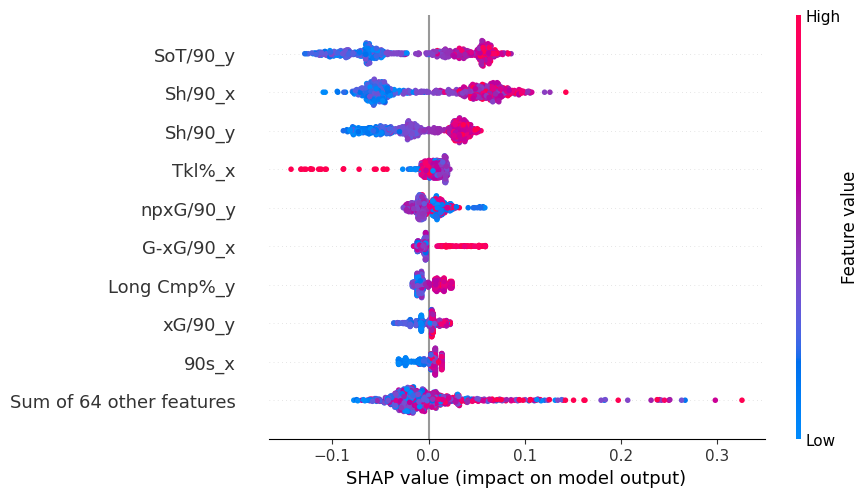

In [11]:
import shap

# explain the model's predictions using SHAP
explainer = shap.Explainer(xgb, att_21_22_scaled)
shap_values = explainer(att_21_22_scaled)

# visualize the feature importance based on SHAP
shap.plots.beeswarm(shap_values, max_display=10, show=False)

import matplotlib.pyplot as pl
pl.savefig("shap_summary_att.png")

In [12]:
#make predictions on KPI for 2023 season
predictions = xgb.predict(att_21_22_scaled)

## Midfielders

In [13]:
#just for midfielders
X = mid_20_21
y = target_mf

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

new_X_train = X_train.drop(['UID','Player','Club'], axis = 1)
new_X_test = X_test.drop(['UID','Player','Club'], axis = 1)
new_y_train = y_train.drop(['UID','Player'], axis = 1)
new_y_test = y_test.drop(['UID','Player'], axis = 1)

In [14]:
# Create the count encoder
target_encoder = ce.TargetEncoder()

# Encode object columns using target encoding
enc_x_train = target_encoder.fit_transform(new_X_train, new_y_train)
enc_x_test = target_encoder.transform(new_X_test)

In [15]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(enc_x_train), columns=enc_x_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(enc_x_test), columns=enc_x_test.columns)

# Define the hyperparameter grid
param_grid = {
    'learning_rate': [.005,0.01,0.05],
    'early_stopping_rounds': [10],
    'max_depth': [2,3,5]
}

# Create the XGBoost model object
xgb_model = XGBRegressor()

# Create the GridSearchCV object
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_scaled, new_y_train,eval_set=[(X_train_scaled, new_y_train), (X_test_scaled, new_y_test)])

# Print the best set of hyperparameters and the corresponding score
print("Best set of hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

[0]	validation_0-rmse:0.67758	validation_1-rmse:0.72598
[1]	validation_0-rmse:0.67618	validation_1-rmse:0.72444
[2]	validation_0-rmse:0.67478	validation_1-rmse:0.72297
[3]	validation_0-rmse:0.67339	validation_1-rmse:0.72145
[4]	validation_0-rmse:0.67202	validation_1-rmse:0.72000
[5]	validation_0-rmse:0.67065	validation_1-rmse:0.71850
[6]	validation_0-rmse:0.66930	validation_1-rmse:0.71707
[7]	validation_0-rmse:0.66796	validation_1-rmse:0.71560
[8]	validation_0-rmse:0.66662	validation_1-rmse:0.71419
[9]	validation_0-rmse:0.66530	validation_1-rmse:0.71274
[10]	validation_0-rmse:0.66399	validation_1-rmse:0.71136
[11]	validation_0-rmse:0.66268	validation_1-rmse:0.70993
[12]	validation_0-rmse:0.66139	validation_1-rmse:0.70857
[13]	validation_0-rmse:0.66011	validation_1-rmse:0.70716
[14]	validation_0-rmse:0.65883	validation_1-rmse:0.70582
[15]	validation_0-rmse:0.65757	validation_1-rmse:0.70443
[16]	validation_0-rmse:0.65632	validation_1-rmse:0.70311
[17]	validation_0-rmse:0.65507	validation

[45]	validation_0-rmse:0.62304	validation_1-rmse:0.67555
[46]	validation_0-rmse:0.62195	validation_1-rmse:0.67444
[47]	validation_0-rmse:0.62090	validation_1-rmse:0.67337
[48]	validation_0-rmse:0.61987	validation_1-rmse:0.67228
[49]	validation_0-rmse:0.61883	validation_1-rmse:0.67120
[50]	validation_0-rmse:0.61778	validation_1-rmse:0.67003
[51]	validation_0-rmse:0.61673	validation_1-rmse:0.66887
[52]	validation_0-rmse:0.61572	validation_1-rmse:0.66781
[53]	validation_0-rmse:0.61469	validation_1-rmse:0.66675
[54]	validation_0-rmse:0.61368	validation_1-rmse:0.66572
[55]	validation_0-rmse:0.61270	validation_1-rmse:0.66469
[56]	validation_0-rmse:0.61164	validation_1-rmse:0.66353
[57]	validation_0-rmse:0.61063	validation_1-rmse:0.66241
[58]	validation_0-rmse:0.60958	validation_1-rmse:0.66127
[59]	validation_0-rmse:0.60858	validation_1-rmse:0.66024
[60]	validation_0-rmse:0.60762	validation_1-rmse:0.65927
[61]	validation_0-rmse:0.60667	validation_1-rmse:0.65827
[62]	validation_0-rmse:0.60565	

[89]	validation_0-rmse:0.57593	validation_1-rmse:0.61749
[90]	validation_0-rmse:0.57514	validation_1-rmse:0.61671
[91]	validation_0-rmse:0.57427	validation_1-rmse:0.61574
[92]	validation_0-rmse:0.57342	validation_1-rmse:0.61481
[93]	validation_0-rmse:0.57263	validation_1-rmse:0.61404
[94]	validation_0-rmse:0.57179	validation_1-rmse:0.61309
[95]	validation_0-rmse:0.57098	validation_1-rmse:0.61229
[96]	validation_0-rmse:0.57015	validation_1-rmse:0.61135
[97]	validation_0-rmse:0.56935	validation_1-rmse:0.61050
[98]	validation_0-rmse:0.56853	validation_1-rmse:0.60958
[99]	validation_0-rmse:0.56777	validation_1-rmse:0.60885
[0]	validation_0-rmse:0.67758	validation_1-rmse:0.72514
[1]	validation_0-rmse:0.67612	validation_1-rmse:0.72365
[2]	validation_0-rmse:0.67466	validation_1-rmse:0.72217
[3]	validation_0-rmse:0.67322	validation_1-rmse:0.72070
[4]	validation_0-rmse:0.67179	validation_1-rmse:0.71925
[5]	validation_0-rmse:0.67038	validation_1-rmse:0.71781
[6]	validation_0-rmse:0.66897	validat

[34]	validation_0-rmse:0.63419	validation_1-rmse:0.67752
[35]	validation_0-rmse:0.63308	validation_1-rmse:0.67628
[36]	validation_0-rmse:0.63192	validation_1-rmse:0.67500
[37]	validation_0-rmse:0.63083	validation_1-rmse:0.67380
[38]	validation_0-rmse:0.62969	validation_1-rmse:0.67254
[39]	validation_0-rmse:0.62857	validation_1-rmse:0.67144
[40]	validation_0-rmse:0.62744	validation_1-rmse:0.67018
[41]	validation_0-rmse:0.62638	validation_1-rmse:0.66901
[42]	validation_0-rmse:0.62527	validation_1-rmse:0.66783
[43]	validation_0-rmse:0.62422	validation_1-rmse:0.66667
[44]	validation_0-rmse:0.62313	validation_1-rmse:0.66544
[45]	validation_0-rmse:0.62206	validation_1-rmse:0.66431
[46]	validation_0-rmse:0.62099	validation_1-rmse:0.66316
[47]	validation_0-rmse:0.61992	validation_1-rmse:0.66197
[48]	validation_0-rmse:0.61888	validation_1-rmse:0.66086
[49]	validation_0-rmse:0.61782	validation_1-rmse:0.65972
[50]	validation_0-rmse:0.61680	validation_1-rmse:0.65873
[51]	validation_0-rmse:0.61574	

[78]	validation_0-rmse:0.57631	validation_1-rmse:0.62704
[79]	validation_0-rmse:0.57527	validation_1-rmse:0.62602
[80]	validation_0-rmse:0.57427	validation_1-rmse:0.62510
[81]	validation_0-rmse:0.57330	validation_1-rmse:0.62412
[82]	validation_0-rmse:0.57228	validation_1-rmse:0.62311
[83]	validation_0-rmse:0.57132	validation_1-rmse:0.62214
[84]	validation_0-rmse:0.57035	validation_1-rmse:0.62129
[85]	validation_0-rmse:0.56940	validation_1-rmse:0.62025
[86]	validation_0-rmse:0.56841	validation_1-rmse:0.61928
[87]	validation_0-rmse:0.56747	validation_1-rmse:0.61843
[88]	validation_0-rmse:0.56653	validation_1-rmse:0.61743
[89]	validation_0-rmse:0.56556	validation_1-rmse:0.61648
[90]	validation_0-rmse:0.56463	validation_1-rmse:0.61553
[91]	validation_0-rmse:0.56371	validation_1-rmse:0.61472
[92]	validation_0-rmse:0.56278	validation_1-rmse:0.61377
[93]	validation_0-rmse:0.56187	validation_1-rmse:0.61297
[94]	validation_0-rmse:0.56097	validation_1-rmse:0.61202
[95]	validation_0-rmse:0.56003	

[23]	validation_0-rmse:0.64077	validation_1-rmse:0.68776
[24]	validation_0-rmse:0.63930	validation_1-rmse:0.68616
[25]	validation_0-rmse:0.63786	validation_1-rmse:0.68487
[26]	validation_0-rmse:0.63639	validation_1-rmse:0.68341
[27]	validation_0-rmse:0.63496	validation_1-rmse:0.68190
[28]	validation_0-rmse:0.63352	validation_1-rmse:0.68047
[29]	validation_0-rmse:0.63212	validation_1-rmse:0.67911
[30]	validation_0-rmse:0.63070	validation_1-rmse:0.67772
[31]	validation_0-rmse:0.62930	validation_1-rmse:0.67629
[32]	validation_0-rmse:0.62789	validation_1-rmse:0.67492
[33]	validation_0-rmse:0.62653	validation_1-rmse:0.67360
[34]	validation_0-rmse:0.62513	validation_1-rmse:0.67226
[35]	validation_0-rmse:0.62378	validation_1-rmse:0.67084
[36]	validation_0-rmse:0.62246	validation_1-rmse:0.66961
[37]	validation_0-rmse:0.62109	validation_1-rmse:0.66830
[38]	validation_0-rmse:0.61975	validation_1-rmse:0.66696
[39]	validation_0-rmse:0.61840	validation_1-rmse:0.66565
[40]	validation_0-rmse:0.61711	

[67]	validation_0-rmse:0.58652	validation_1-rmse:0.63710
[68]	validation_0-rmse:0.58547	validation_1-rmse:0.63619
[69]	validation_0-rmse:0.58440	validation_1-rmse:0.63508
[70]	validation_0-rmse:0.58330	validation_1-rmse:0.63402
[71]	validation_0-rmse:0.58226	validation_1-rmse:0.63307
[72]	validation_0-rmse:0.58124	validation_1-rmse:0.63212
[73]	validation_0-rmse:0.58018	validation_1-rmse:0.63104
[74]	validation_0-rmse:0.57912	validation_1-rmse:0.62998
[75]	validation_0-rmse:0.57810	validation_1-rmse:0.62905
[76]	validation_0-rmse:0.57710	validation_1-rmse:0.62814
[77]	validation_0-rmse:0.57608	validation_1-rmse:0.62709
[78]	validation_0-rmse:0.57510	validation_1-rmse:0.62619
[79]	validation_0-rmse:0.57406	validation_1-rmse:0.62516
[80]	validation_0-rmse:0.57307	validation_1-rmse:0.62411
[81]	validation_0-rmse:0.57210	validation_1-rmse:0.62321
[82]	validation_0-rmse:0.57112	validation_1-rmse:0.62232
[83]	validation_0-rmse:0.57011	validation_1-rmse:0.62134
[84]	validation_0-rmse:0.56917	

[12]	validation_0-rmse:0.65290	validation_1-rmse:0.70615
[13]	validation_0-rmse:0.65095	validation_1-rmse:0.70477
[14]	validation_0-rmse:0.64900	validation_1-rmse:0.70320
[15]	validation_0-rmse:0.64709	validation_1-rmse:0.70180
[16]	validation_0-rmse:0.64516	validation_1-rmse:0.70025
[17]	validation_0-rmse:0.64326	validation_1-rmse:0.69872
[18]	validation_0-rmse:0.64138	validation_1-rmse:0.69727
[19]	validation_0-rmse:0.63951	validation_1-rmse:0.69576
[20]	validation_0-rmse:0.63764	validation_1-rmse:0.69442
[21]	validation_0-rmse:0.63581	validation_1-rmse:0.69301
[22]	validation_0-rmse:0.63396	validation_1-rmse:0.69154
[23]	validation_0-rmse:0.63212	validation_1-rmse:0.69006
[24]	validation_0-rmse:0.63028	validation_1-rmse:0.68863
[25]	validation_0-rmse:0.62844	validation_1-rmse:0.68712
[26]	validation_0-rmse:0.62658	validation_1-rmse:0.68577
[27]	validation_0-rmse:0.62481	validation_1-rmse:0.68435
[28]	validation_0-rmse:0.62303	validation_1-rmse:0.68290
[29]	validation_0-rmse:0.62119	

[56]	validation_0-rmse:0.57915	validation_1-rmse:0.65008
[57]	validation_0-rmse:0.57765	validation_1-rmse:0.64896
[58]	validation_0-rmse:0.57621	validation_1-rmse:0.64770
[59]	validation_0-rmse:0.57473	validation_1-rmse:0.64655
[60]	validation_0-rmse:0.57328	validation_1-rmse:0.64564
[61]	validation_0-rmse:0.57185	validation_1-rmse:0.64438
[62]	validation_0-rmse:0.57040	validation_1-rmse:0.64330
[63]	validation_0-rmse:0.56901	validation_1-rmse:0.64208
[64]	validation_0-rmse:0.56754	validation_1-rmse:0.64109
[65]	validation_0-rmse:0.56615	validation_1-rmse:0.64013
[66]	validation_0-rmse:0.56478	validation_1-rmse:0.63892
[67]	validation_0-rmse:0.56336	validation_1-rmse:0.63788
[68]	validation_0-rmse:0.56199	validation_1-rmse:0.63672
[69]	validation_0-rmse:0.56062	validation_1-rmse:0.63579
[70]	validation_0-rmse:0.55920	validation_1-rmse:0.63483
[71]	validation_0-rmse:0.55786	validation_1-rmse:0.63367
[72]	validation_0-rmse:0.55652	validation_1-rmse:0.63274
[73]	validation_0-rmse:0.55520	

[0]	validation_0-rmse:0.67698	validation_1-rmse:0.72494
[1]	validation_0-rmse:0.67493	validation_1-rmse:0.72326
[2]	validation_0-rmse:0.67288	validation_1-rmse:0.72160
[3]	validation_0-rmse:0.67087	validation_1-rmse:0.72002
[4]	validation_0-rmse:0.66886	validation_1-rmse:0.71847
[5]	validation_0-rmse:0.66686	validation_1-rmse:0.71684
[6]	validation_0-rmse:0.66489	validation_1-rmse:0.71532
[7]	validation_0-rmse:0.66293	validation_1-rmse:0.71381
[8]	validation_0-rmse:0.66097	validation_1-rmse:0.71223
[9]	validation_0-rmse:0.65903	validation_1-rmse:0.71086
[10]	validation_0-rmse:0.65711	validation_1-rmse:0.70939
[11]	validation_0-rmse:0.65520	validation_1-rmse:0.70787
[12]	validation_0-rmse:0.65330	validation_1-rmse:0.70656
[13]	validation_0-rmse:0.65141	validation_1-rmse:0.70503
[14]	validation_0-rmse:0.64954	validation_1-rmse:0.70368
[15]	validation_0-rmse:0.64771	validation_1-rmse:0.70226
[16]	validation_0-rmse:0.64585	validation_1-rmse:0.70076
[17]	validation_0-rmse:0.64403	validation

[45]	validation_0-rmse:0.59531	validation_1-rmse:0.65696
[46]	validation_0-rmse:0.59366	validation_1-rmse:0.65552
[47]	validation_0-rmse:0.59205	validation_1-rmse:0.65430
[48]	validation_0-rmse:0.59041	validation_1-rmse:0.65287
[49]	validation_0-rmse:0.58884	validation_1-rmse:0.65182
[50]	validation_0-rmse:0.58727	validation_1-rmse:0.65076
[51]	validation_0-rmse:0.58567	validation_1-rmse:0.64937
[52]	validation_0-rmse:0.58410	validation_1-rmse:0.64832
[53]	validation_0-rmse:0.58254	validation_1-rmse:0.64720
[54]	validation_0-rmse:0.58098	validation_1-rmse:0.64585
[55]	validation_0-rmse:0.57946	validation_1-rmse:0.64484
[56]	validation_0-rmse:0.57790	validation_1-rmse:0.64349
[57]	validation_0-rmse:0.57638	validation_1-rmse:0.64258
[58]	validation_0-rmse:0.57488	validation_1-rmse:0.64146
[59]	validation_0-rmse:0.57334	validation_1-rmse:0.64013
[60]	validation_0-rmse:0.57184	validation_1-rmse:0.63919
[61]	validation_0-rmse:0.57034	validation_1-rmse:0.63817
[62]	validation_0-rmse:0.56883	

[89]	validation_0-rmse:0.52613	validation_1-rmse:0.57126
[90]	validation_0-rmse:0.52519	validation_1-rmse:0.57029
[91]	validation_0-rmse:0.52423	validation_1-rmse:0.56927
[92]	validation_0-rmse:0.52331	validation_1-rmse:0.56833
[93]	validation_0-rmse:0.52242	validation_1-rmse:0.56720
[94]	validation_0-rmse:0.52161	validation_1-rmse:0.56647
[95]	validation_0-rmse:0.52066	validation_1-rmse:0.56555
[96]	validation_0-rmse:0.51978	validation_1-rmse:0.56475
[97]	validation_0-rmse:0.51895	validation_1-rmse:0.56382
[98]	validation_0-rmse:0.51795	validation_1-rmse:0.56282
[99]	validation_0-rmse:0.51708	validation_1-rmse:0.56199
[0]	validation_0-rmse:0.67747	validation_1-rmse:0.73296
[1]	validation_0-rmse:0.67463	validation_1-rmse:0.72998
[2]	validation_0-rmse:0.67183	validation_1-rmse:0.72705
[3]	validation_0-rmse:0.66910	validation_1-rmse:0.72418
[4]	validation_0-rmse:0.66637	validation_1-rmse:0.72137
[5]	validation_0-rmse:0.66372	validation_1-rmse:0.71857
[6]	validation_0-rmse:0.66106	validat

[34]	validation_0-rmse:0.59372	validation_1-rmse:0.63643
[35]	validation_0-rmse:0.59188	validation_1-rmse:0.63462
[36]	validation_0-rmse:0.59001	validation_1-rmse:0.63263
[37]	validation_0-rmse:0.58821	validation_1-rmse:0.63084
[38]	validation_0-rmse:0.58637	validation_1-rmse:0.62873
[39]	validation_0-rmse:0.58466	validation_1-rmse:0.62706
[40]	validation_0-rmse:0.58287	validation_1-rmse:0.62502
[41]	validation_0-rmse:0.58110	validation_1-rmse:0.62314
[42]	validation_0-rmse:0.57927	validation_1-rmse:0.62108
[43]	validation_0-rmse:0.57747	validation_1-rmse:0.61906
[44]	validation_0-rmse:0.57584	validation_1-rmse:0.61748
[45]	validation_0-rmse:0.57412	validation_1-rmse:0.61562
[46]	validation_0-rmse:0.57248	validation_1-rmse:0.61389
[47]	validation_0-rmse:0.57079	validation_1-rmse:0.61198
[48]	validation_0-rmse:0.56918	validation_1-rmse:0.61028
[49]	validation_0-rmse:0.56766	validation_1-rmse:0.60882
[50]	validation_0-rmse:0.56608	validation_1-rmse:0.60716
[51]	validation_0-rmse:0.56449	

[78]	validation_0-rmse:0.53409	validation_1-rmse:0.57829
[79]	validation_0-rmse:0.53300	validation_1-rmse:0.57689
[80]	validation_0-rmse:0.53193	validation_1-rmse:0.57577
[81]	validation_0-rmse:0.53088	validation_1-rmse:0.57440
[82]	validation_0-rmse:0.52984	validation_1-rmse:0.57331
[83]	validation_0-rmse:0.52879	validation_1-rmse:0.57219
[84]	validation_0-rmse:0.52777	validation_1-rmse:0.57124
[85]	validation_0-rmse:0.52676	validation_1-rmse:0.57013
[86]	validation_0-rmse:0.52583	validation_1-rmse:0.56937
[87]	validation_0-rmse:0.52485	validation_1-rmse:0.56845
[88]	validation_0-rmse:0.52386	validation_1-rmse:0.56738
[89]	validation_0-rmse:0.52292	validation_1-rmse:0.56636
[90]	validation_0-rmse:0.52197	validation_1-rmse:0.56513
[91]	validation_0-rmse:0.52105	validation_1-rmse:0.56426
[92]	validation_0-rmse:0.52011	validation_1-rmse:0.56325
[93]	validation_0-rmse:0.51920	validation_1-rmse:0.56225
[94]	validation_0-rmse:0.51830	validation_1-rmse:0.56141
[95]	validation_0-rmse:0.51741	

[23]	validation_0-rmse:0.61104	validation_1-rmse:0.66072
[24]	validation_0-rmse:0.60853	validation_1-rmse:0.65833
[25]	validation_0-rmse:0.60605	validation_1-rmse:0.65606
[26]	validation_0-rmse:0.60373	validation_1-rmse:0.65360
[27]	validation_0-rmse:0.60132	validation_1-rmse:0.65138
[28]	validation_0-rmse:0.59894	validation_1-rmse:0.64901
[29]	validation_0-rmse:0.59659	validation_1-rmse:0.64676
[30]	validation_0-rmse:0.59437	validation_1-rmse:0.64446
[31]	validation_0-rmse:0.59209	validation_1-rmse:0.64236
[32]	validation_0-rmse:0.58983	validation_1-rmse:0.64021
[33]	validation_0-rmse:0.58760	validation_1-rmse:0.63802
[34]	validation_0-rmse:0.58547	validation_1-rmse:0.63581
[35]	validation_0-rmse:0.58331	validation_1-rmse:0.63381
[36]	validation_0-rmse:0.58126	validation_1-rmse:0.63172
[37]	validation_0-rmse:0.57919	validation_1-rmse:0.62988
[38]	validation_0-rmse:0.57710	validation_1-rmse:0.62781
[39]	validation_0-rmse:0.57510	validation_1-rmse:0.62570
[40]	validation_0-rmse:0.57313	

[67]	validation_0-rmse:0.52698	validation_1-rmse:0.58069
[68]	validation_0-rmse:0.52550	validation_1-rmse:0.57944
[69]	validation_0-rmse:0.52408	validation_1-rmse:0.57810
[70]	validation_0-rmse:0.52261	validation_1-rmse:0.57670
[71]	validation_0-rmse:0.52116	validation_1-rmse:0.57553
[72]	validation_0-rmse:0.51975	validation_1-rmse:0.57409
[73]	validation_0-rmse:0.51841	validation_1-rmse:0.57283
[74]	validation_0-rmse:0.51702	validation_1-rmse:0.57152
[75]	validation_0-rmse:0.51565	validation_1-rmse:0.57042
[76]	validation_0-rmse:0.51431	validation_1-rmse:0.56917
[77]	validation_0-rmse:0.51304	validation_1-rmse:0.56798
[78]	validation_0-rmse:0.51172	validation_1-rmse:0.56692
[79]	validation_0-rmse:0.51040	validation_1-rmse:0.56596
[80]	validation_0-rmse:0.50918	validation_1-rmse:0.56469
[81]	validation_0-rmse:0.50791	validation_1-rmse:0.56365
[82]	validation_0-rmse:0.50672	validation_1-rmse:0.56255
[83]	validation_0-rmse:0.50555	validation_1-rmse:0.56146
[84]	validation_0-rmse:0.50432	

[12]	validation_0-rmse:0.63900	validation_1-rmse:0.68794
[13]	validation_0-rmse:0.63622	validation_1-rmse:0.68537
[14]	validation_0-rmse:0.63344	validation_1-rmse:0.68260
[15]	validation_0-rmse:0.63055	validation_1-rmse:0.67978
[16]	validation_0-rmse:0.62782	validation_1-rmse:0.67724
[17]	validation_0-rmse:0.62512	validation_1-rmse:0.67456
[18]	validation_0-rmse:0.62235	validation_1-rmse:0.67189
[19]	validation_0-rmse:0.61964	validation_1-rmse:0.66906
[20]	validation_0-rmse:0.61704	validation_1-rmse:0.66665
[21]	validation_0-rmse:0.61439	validation_1-rmse:0.66407
[22]	validation_0-rmse:0.61191	validation_1-rmse:0.66180
[23]	validation_0-rmse:0.60942	validation_1-rmse:0.65920
[24]	validation_0-rmse:0.60703	validation_1-rmse:0.65712
[25]	validation_0-rmse:0.60460	validation_1-rmse:0.65473
[26]	validation_0-rmse:0.60224	validation_1-rmse:0.65241
[27]	validation_0-rmse:0.59988	validation_1-rmse:0.64995
[28]	validation_0-rmse:0.59747	validation_1-rmse:0.64746
[29]	validation_0-rmse:0.59523	

[56]	validation_0-rmse:0.54316	validation_1-rmse:0.58788
[57]	validation_0-rmse:0.54147	validation_1-rmse:0.58640
[58]	validation_0-rmse:0.53990	validation_1-rmse:0.58489
[59]	validation_0-rmse:0.53833	validation_1-rmse:0.58338
[60]	validation_0-rmse:0.53678	validation_1-rmse:0.58190
[61]	validation_0-rmse:0.53515	validation_1-rmse:0.58042
[62]	validation_0-rmse:0.53366	validation_1-rmse:0.57899
[63]	validation_0-rmse:0.53216	validation_1-rmse:0.57759
[64]	validation_0-rmse:0.53057	validation_1-rmse:0.57643
[65]	validation_0-rmse:0.52904	validation_1-rmse:0.57512
[66]	validation_0-rmse:0.52758	validation_1-rmse:0.57383
[67]	validation_0-rmse:0.52615	validation_1-rmse:0.57248
[68]	validation_0-rmse:0.52477	validation_1-rmse:0.57107
[69]	validation_0-rmse:0.52331	validation_1-rmse:0.56991
[70]	validation_0-rmse:0.52193	validation_1-rmse:0.56875
[71]	validation_0-rmse:0.52056	validation_1-rmse:0.56753
[72]	validation_0-rmse:0.51911	validation_1-rmse:0.56641
[73]	validation_0-rmse:0.51777	

[0]	validation_0-rmse:0.67614	validation_1-rmse:0.73226
[1]	validation_0-rmse:0.67196	validation_1-rmse:0.72825
[2]	validation_0-rmse:0.66783	validation_1-rmse:0.72432
[3]	validation_0-rmse:0.66381	validation_1-rmse:0.72070
[4]	validation_0-rmse:0.65975	validation_1-rmse:0.71697
[5]	validation_0-rmse:0.65584	validation_1-rmse:0.71348
[6]	validation_0-rmse:0.65189	validation_1-rmse:0.70978
[7]	validation_0-rmse:0.64797	validation_1-rmse:0.70627
[8]	validation_0-rmse:0.64422	validation_1-rmse:0.70308
[9]	validation_0-rmse:0.64042	validation_1-rmse:0.69952
[10]	validation_0-rmse:0.63675	validation_1-rmse:0.69664
[11]	validation_0-rmse:0.63312	validation_1-rmse:0.69371
[12]	validation_0-rmse:0.62954	validation_1-rmse:0.69093
[13]	validation_0-rmse:0.62597	validation_1-rmse:0.68762
[14]	validation_0-rmse:0.62248	validation_1-rmse:0.68493
[15]	validation_0-rmse:0.61899	validation_1-rmse:0.68184
[16]	validation_0-rmse:0.61555	validation_1-rmse:0.67923
[17]	validation_0-rmse:0.61208	validation

[45]	validation_0-rmse:0.52677	validation_1-rmse:0.60451
[46]	validation_0-rmse:0.52435	validation_1-rmse:0.60274
[47]	validation_0-rmse:0.52205	validation_1-rmse:0.60112
[48]	validation_0-rmse:0.51952	validation_1-rmse:0.59928
[49]	validation_0-rmse:0.51703	validation_1-rmse:0.59742
[50]	validation_0-rmse:0.51482	validation_1-rmse:0.59579
[51]	validation_0-rmse:0.51232	validation_1-rmse:0.59443
[52]	validation_0-rmse:0.51014	validation_1-rmse:0.59306
[53]	validation_0-rmse:0.50775	validation_1-rmse:0.59173
[54]	validation_0-rmse:0.50563	validation_1-rmse:0.59025
[55]	validation_0-rmse:0.50331	validation_1-rmse:0.58875
[56]	validation_0-rmse:0.50097	validation_1-rmse:0.58700
[57]	validation_0-rmse:0.49861	validation_1-rmse:0.58525
[58]	validation_0-rmse:0.49639	validation_1-rmse:0.58389
[59]	validation_0-rmse:0.49415	validation_1-rmse:0.58223
[60]	validation_0-rmse:0.49196	validation_1-rmse:0.58106
[61]	validation_0-rmse:0.48982	validation_1-rmse:0.57950
[62]	validation_0-rmse:0.48767	

[89]	validation_0-rmse:0.44568	validation_1-rmse:0.55611
[90]	validation_0-rmse:0.44409	validation_1-rmse:0.55529
[91]	validation_0-rmse:0.44255	validation_1-rmse:0.55436
[92]	validation_0-rmse:0.44099	validation_1-rmse:0.55346
[93]	validation_0-rmse:0.43953	validation_1-rmse:0.55253
[94]	validation_0-rmse:0.43806	validation_1-rmse:0.55173
[95]	validation_0-rmse:0.43655	validation_1-rmse:0.55095
[96]	validation_0-rmse:0.43502	validation_1-rmse:0.55020
[97]	validation_0-rmse:0.43364	validation_1-rmse:0.54930
[98]	validation_0-rmse:0.43219	validation_1-rmse:0.54876
[99]	validation_0-rmse:0.43084	validation_1-rmse:0.54812
[0]	validation_0-rmse:0.67506	validation_1-rmse:0.72271
[1]	validation_0-rmse:0.67107	validation_1-rmse:0.71921
[2]	validation_0-rmse:0.66714	validation_1-rmse:0.71577
[3]	validation_0-rmse:0.66327	validation_1-rmse:0.71239
[4]	validation_0-rmse:0.65946	validation_1-rmse:0.70875
[5]	validation_0-rmse:0.65575	validation_1-rmse:0.70527
[6]	validation_0-rmse:0.65179	validat

[34]	validation_0-rmse:0.47159	validation_1-rmse:0.51785
[35]	validation_0-rmse:0.46938	validation_1-rmse:0.51614
[36]	validation_0-rmse:0.46727	validation_1-rmse:0.51421
[37]	validation_0-rmse:0.46532	validation_1-rmse:0.51316
[38]	validation_0-rmse:0.46357	validation_1-rmse:0.51198
[39]	validation_0-rmse:0.46171	validation_1-rmse:0.51073
[40]	validation_0-rmse:0.45993	validation_1-rmse:0.50914
[41]	validation_0-rmse:0.45802	validation_1-rmse:0.50830
[42]	validation_0-rmse:0.45655	validation_1-rmse:0.50773
[43]	validation_0-rmse:0.45518	validation_1-rmse:0.50669
[44]	validation_0-rmse:0.45352	validation_1-rmse:0.50601
[45]	validation_0-rmse:0.45198	validation_1-rmse:0.50543
[46]	validation_0-rmse:0.45043	validation_1-rmse:0.50451
[47]	validation_0-rmse:0.44884	validation_1-rmse:0.50338
[48]	validation_0-rmse:0.44750	validation_1-rmse:0.50283
[49]	validation_0-rmse:0.44610	validation_1-rmse:0.50199
[50]	validation_0-rmse:0.44475	validation_1-rmse:0.50116
[51]	validation_0-rmse:0.44345	

[7]	validation_0-rmse:0.58316	validation_1-rmse:0.62561
[8]	validation_0-rmse:0.57441	validation_1-rmse:0.61634
[9]	validation_0-rmse:0.56592	validation_1-rmse:0.60675
[10]	validation_0-rmse:0.55829	validation_1-rmse:0.59870
[11]	validation_0-rmse:0.55153	validation_1-rmse:0.59225
[12]	validation_0-rmse:0.54489	validation_1-rmse:0.58532
[13]	validation_0-rmse:0.53843	validation_1-rmse:0.57727
[14]	validation_0-rmse:0.53290	validation_1-rmse:0.57148
[15]	validation_0-rmse:0.52755	validation_1-rmse:0.56588
[16]	validation_0-rmse:0.52280	validation_1-rmse:0.55983
[17]	validation_0-rmse:0.51797	validation_1-rmse:0.55402
[18]	validation_0-rmse:0.51347	validation_1-rmse:0.54854
[19]	validation_0-rmse:0.50936	validation_1-rmse:0.54361
[20]	validation_0-rmse:0.50560	validation_1-rmse:0.53813
[21]	validation_0-rmse:0.50214	validation_1-rmse:0.53450
[22]	validation_0-rmse:0.49866	validation_1-rmse:0.53086
[23]	validation_0-rmse:0.49551	validation_1-rmse:0.52736
[24]	validation_0-rmse:0.49277	val

[83]	validation_0-rmse:0.41892	validation_1-rmse:0.48184
[84]	validation_0-rmse:0.41869	validation_1-rmse:0.48173
[85]	validation_0-rmse:0.41824	validation_1-rmse:0.48139
[86]	validation_0-rmse:0.41772	validation_1-rmse:0.48063
[87]	validation_0-rmse:0.41712	validation_1-rmse:0.48086
[88]	validation_0-rmse:0.41666	validation_1-rmse:0.48060
[89]	validation_0-rmse:0.41612	validation_1-rmse:0.48039
[90]	validation_0-rmse:0.41595	validation_1-rmse:0.48028
[91]	validation_0-rmse:0.41571	validation_1-rmse:0.48070
[92]	validation_0-rmse:0.41528	validation_1-rmse:0.48044
[93]	validation_0-rmse:0.41455	validation_1-rmse:0.48020
[94]	validation_0-rmse:0.41404	validation_1-rmse:0.47997
[95]	validation_0-rmse:0.41362	validation_1-rmse:0.47972
[96]	validation_0-rmse:0.41339	validation_1-rmse:0.47980
[97]	validation_0-rmse:0.41257	validation_1-rmse:0.47976
[98]	validation_0-rmse:0.41216	validation_1-rmse:0.48016
[99]	validation_0-rmse:0.41153	validation_1-rmse:0.48046
[0]	validation_0-rmse:0.66503	v

[28]	validation_0-rmse:0.44842	validation_1-rmse:0.51812
[29]	validation_0-rmse:0.44498	validation_1-rmse:0.51660
[30]	validation_0-rmse:0.44177	validation_1-rmse:0.51494
[31]	validation_0-rmse:0.43884	validation_1-rmse:0.51287
[32]	validation_0-rmse:0.43592	validation_1-rmse:0.51113
[33]	validation_0-rmse:0.43301	validation_1-rmse:0.50961
[34]	validation_0-rmse:0.42987	validation_1-rmse:0.50748
[35]	validation_0-rmse:0.42753	validation_1-rmse:0.50651
[36]	validation_0-rmse:0.42520	validation_1-rmse:0.50529
[37]	validation_0-rmse:0.42237	validation_1-rmse:0.50384
[38]	validation_0-rmse:0.42020	validation_1-rmse:0.50388
[39]	validation_0-rmse:0.41807	validation_1-rmse:0.50259
[40]	validation_0-rmse:0.41582	validation_1-rmse:0.50075
[41]	validation_0-rmse:0.41363	validation_1-rmse:0.50117
[42]	validation_0-rmse:0.41182	validation_1-rmse:0.50080
[43]	validation_0-rmse:0.40976	validation_1-rmse:0.49989
[44]	validation_0-rmse:0.40784	validation_1-rmse:0.49917
[45]	validation_0-rmse:0.40631	

[32]	validation_0-rmse:0.43936	validation_1-rmse:0.50159
[33]	validation_0-rmse:0.43675	validation_1-rmse:0.49988
[34]	validation_0-rmse:0.43453	validation_1-rmse:0.49760
[35]	validation_0-rmse:0.43219	validation_1-rmse:0.49603
[36]	validation_0-rmse:0.42974	validation_1-rmse:0.49528
[37]	validation_0-rmse:0.42827	validation_1-rmse:0.49406
[38]	validation_0-rmse:0.42624	validation_1-rmse:0.49297
[39]	validation_0-rmse:0.42380	validation_1-rmse:0.49331
[40]	validation_0-rmse:0.42196	validation_1-rmse:0.49240
[41]	validation_0-rmse:0.42032	validation_1-rmse:0.49169
[42]	validation_0-rmse:0.41868	validation_1-rmse:0.49138
[43]	validation_0-rmse:0.41654	validation_1-rmse:0.48992
[44]	validation_0-rmse:0.41471	validation_1-rmse:0.49042
[45]	validation_0-rmse:0.41290	validation_1-rmse:0.48976
[46]	validation_0-rmse:0.41130	validation_1-rmse:0.48912
[47]	validation_0-rmse:0.40950	validation_1-rmse:0.48928
[48]	validation_0-rmse:0.40811	validation_1-rmse:0.48870
[49]	validation_0-rmse:0.40653	

[7]	validation_0-rmse:0.57291	validation_1-rmse:0.61708
[8]	validation_0-rmse:0.56294	validation_1-rmse:0.60682
[9]	validation_0-rmse:0.55351	validation_1-rmse:0.59793
[10]	validation_0-rmse:0.54502	validation_1-rmse:0.58984
[11]	validation_0-rmse:0.53689	validation_1-rmse:0.58216
[12]	validation_0-rmse:0.52926	validation_1-rmse:0.57476
[13]	validation_0-rmse:0.52180	validation_1-rmse:0.56858
[14]	validation_0-rmse:0.51472	validation_1-rmse:0.56277
[15]	validation_0-rmse:0.50858	validation_1-rmse:0.55766
[16]	validation_0-rmse:0.50263	validation_1-rmse:0.55265
[17]	validation_0-rmse:0.49696	validation_1-rmse:0.54769
[18]	validation_0-rmse:0.49088	validation_1-rmse:0.54199
[19]	validation_0-rmse:0.48560	validation_1-rmse:0.53884
[20]	validation_0-rmse:0.48033	validation_1-rmse:0.53405
[21]	validation_0-rmse:0.47587	validation_1-rmse:0.52962
[22]	validation_0-rmse:0.47095	validation_1-rmse:0.52595
[23]	validation_0-rmse:0.46621	validation_1-rmse:0.52327
[24]	validation_0-rmse:0.46245	val

[57]	validation_0-rmse:0.28434	validation_1-rmse:0.50189
[58]	validation_0-rmse:0.28271	validation_1-rmse:0.50191
[59]	validation_0-rmse:0.28042	validation_1-rmse:0.50180
[60]	validation_0-rmse:0.27892	validation_1-rmse:0.50105
[61]	validation_0-rmse:0.27710	validation_1-rmse:0.50106
[62]	validation_0-rmse:0.27574	validation_1-rmse:0.50123
[63]	validation_0-rmse:0.27411	validation_1-rmse:0.50163
[64]	validation_0-rmse:0.27269	validation_1-rmse:0.50194
[65]	validation_0-rmse:0.27155	validation_1-rmse:0.50139
[66]	validation_0-rmse:0.27030	validation_1-rmse:0.50167
[67]	validation_0-rmse:0.26841	validation_1-rmse:0.50133
[68]	validation_0-rmse:0.26721	validation_1-rmse:0.50144
[69]	validation_0-rmse:0.26587	validation_1-rmse:0.50137
[70]	validation_0-rmse:0.26426	validation_1-rmse:0.50116
[0]	validation_0-rmse:0.65946	validation_1-rmse:0.71764
[1]	validation_0-rmse:0.63970	validation_1-rmse:0.69895
[2]	validation_0-rmse:0.62147	validation_1-rmse:0.68514
[3]	validation_0-rmse:0.60390	vali

[5]	validation_0-rmse:0.57369	validation_1-rmse:0.64802
[6]	validation_0-rmse:0.55894	validation_1-rmse:0.63602
[7]	validation_0-rmse:0.54499	validation_1-rmse:0.62635
[8]	validation_0-rmse:0.53207	validation_1-rmse:0.61791
[9]	validation_0-rmse:0.51979	validation_1-rmse:0.60905
[10]	validation_0-rmse:0.50867	validation_1-rmse:0.60008
[11]	validation_0-rmse:0.49785	validation_1-rmse:0.59184
[12]	validation_0-rmse:0.48703	validation_1-rmse:0.58533
[13]	validation_0-rmse:0.47802	validation_1-rmse:0.57848
[14]	validation_0-rmse:0.46875	validation_1-rmse:0.57245
[15]	validation_0-rmse:0.46015	validation_1-rmse:0.56719
[16]	validation_0-rmse:0.45199	validation_1-rmse:0.56231
[17]	validation_0-rmse:0.44362	validation_1-rmse:0.55691
[18]	validation_0-rmse:0.43683	validation_1-rmse:0.55295
[19]	validation_0-rmse:0.42962	validation_1-rmse:0.54897
[20]	validation_0-rmse:0.42296	validation_1-rmse:0.54584
[21]	validation_0-rmse:0.41625	validation_1-rmse:0.54194
[22]	validation_0-rmse:0.41067	valid

[49]	validation_0-rmse:0.29912	validation_1-rmse:0.49194
[50]	validation_0-rmse:0.29653	validation_1-rmse:0.49191
[51]	validation_0-rmse:0.29442	validation_1-rmse:0.49141
[52]	validation_0-rmse:0.29271	validation_1-rmse:0.49138
[53]	validation_0-rmse:0.29052	validation_1-rmse:0.49121
[54]	validation_0-rmse:0.28886	validation_1-rmse:0.49084
[55]	validation_0-rmse:0.28689	validation_1-rmse:0.49086
[56]	validation_0-rmse:0.28511	validation_1-rmse:0.49058
[57]	validation_0-rmse:0.28346	validation_1-rmse:0.49067
[58]	validation_0-rmse:0.28217	validation_1-rmse:0.49047
[59]	validation_0-rmse:0.28029	validation_1-rmse:0.49006
[60]	validation_0-rmse:0.27856	validation_1-rmse:0.49031
[61]	validation_0-rmse:0.27667	validation_1-rmse:0.49064
[62]	validation_0-rmse:0.27530	validation_1-rmse:0.49058
[63]	validation_0-rmse:0.27405	validation_1-rmse:0.49056
[64]	validation_0-rmse:0.27216	validation_1-rmse:0.49091
[65]	validation_0-rmse:0.27112	validation_1-rmse:0.49057
[66]	validation_0-rmse:0.27011	

In [16]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(enc_x_train), columns=enc_x_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(enc_x_test), columns=enc_x_test.columns)

# List of models to try
models = [
    LinearRegression(),
    Ridge(),
    XGBRegressor(**grid_search.best_params_),
    SVR()
]

# Dictionary to store MSE values
mse_dict = {'Model': [], 'MSE': []}

# Train and evaluate each model
for model in models:
    model_name = model.__class__.__name__

    if model_name == 'XGBRegressor':
        model.fit(X_train_scaled, new_y_train, eval_set=[(X_train_scaled, new_y_train), (X_test_scaled, new_y_test)])
    
    else:
        # Train the model
        model.fit(X_train_scaled, new_y_train.values.ravel())

    # Make predictions
    predictions = model.predict(X_test_scaled)

    # Evaluate the model
    mse = mean_squared_error(new_y_test, predictions)
    mse_dict['Model'].append(model_name)
    mse_dict['MSE'].append(mse)
    print(f'{model_name} Mean Squared Error: {mse}')

# Create a DataFrame from the MSE dictionary
mse_df = pd.DataFrame(mse_dict)
mse_df

LinearRegression Mean Squared Error: 0.2630400146144282
Ridge Mean Squared Error: 0.25596405381553167
[0]	validation_0-rmse:0.66224	validation_1-rmse:0.71103
[1]	validation_0-rmse:0.64670	validation_1-rmse:0.69521
[2]	validation_0-rmse:0.63218	validation_1-rmse:0.68051
[3]	validation_0-rmse:0.61854	validation_1-rmse:0.66779
[4]	validation_0-rmse:0.60538	validation_1-rmse:0.65462
[5]	validation_0-rmse:0.59366	validation_1-rmse:0.64442
[6]	validation_0-rmse:0.58225	validation_1-rmse:0.63316
[7]	validation_0-rmse:0.57117	validation_1-rmse:0.62262
[8]	validation_0-rmse:0.56148	validation_1-rmse:0.61130
[9]	validation_0-rmse:0.55178	validation_1-rmse:0.60200
[10]	validation_0-rmse:0.54269	validation_1-rmse:0.59340
[11]	validation_0-rmse:0.53420	validation_1-rmse:0.58528
[12]	validation_0-rmse:0.52668	validation_1-rmse:0.57868
[13]	validation_0-rmse:0.51937	validation_1-rmse:0.57170
[14]	validation_0-rmse:0.51219	validation_1-rmse:0.56466
[15]	validation_0-rmse:0.50579	validation_1-rmse:0.55

,Model,MSE
0,LinearRegression,0.263040
1,Ridge,0.255964
2,XGBRegressor,0.238934
3,SVR,0.279200


In [17]:
np.var(new_y_test)

KP/90    0.517167
dtype: float64

In [18]:
#drop identifier features
new_X = X.drop(['Player','UID','Club'], axis=1)
new_y = y.drop(['UID','Player'], axis=1)
new_mid_21_22 = mid_21_22.drop(['Player','UID','Club'], axis=1)

# Encode object columns using target encoding
enc_X = target_encoder.fit_transform(new_X, new_y)
enc_mid_21_22 = target_encoder.transform(new_mid_21_22)

#scale data
X_scaled = pd.DataFrame(scaler.fit_transform(enc_X), columns=enc_X.columns)
mid_21_22_scaled = pd.DataFrame(scaler.transform(enc_mid_21_22), columns=enc_mid_21_22.columns)

#fit to best model
xgb = XGBRegressor(**grid_search.best_params_)
xgb.fit(X_train_scaled, new_y_train.values.ravel(), eval_set=[(X_train_scaled, new_y_train), (X_test_scaled, new_y_test)])

[0]	validation_0-rmse:0.66224	validation_1-rmse:0.71103
[1]	validation_0-rmse:0.64670	validation_1-rmse:0.69521
[2]	validation_0-rmse:0.63218	validation_1-rmse:0.68051
[3]	validation_0-rmse:0.61854	validation_1-rmse:0.66779
[4]	validation_0-rmse:0.60538	validation_1-rmse:0.65462
[5]	validation_0-rmse:0.59366	validation_1-rmse:0.64442
[6]	validation_0-rmse:0.58225	validation_1-rmse:0.63316
[7]	validation_0-rmse:0.57117	validation_1-rmse:0.62262
[8]	validation_0-rmse:0.56148	validation_1-rmse:0.61130
[9]	validation_0-rmse:0.55178	validation_1-rmse:0.60200
[10]	validation_0-rmse:0.54269	validation_1-rmse:0.59340
[11]	validation_0-rmse:0.53420	validation_1-rmse:0.58528
[12]	validation_0-rmse:0.52668	validation_1-rmse:0.57868
[13]	validation_0-rmse:0.51937	validation_1-rmse:0.57170
[14]	validation_0-rmse:0.51219	validation_1-rmse:0.56466
[15]	validation_0-rmse:0.50579	validation_1-rmse:0.55864
[16]	validation_0-rmse:0.49928	validation_1-rmse:0.55388
[17]	validation_0-rmse:0.49328	validation

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=10,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [19]:
np.var(new_y_test)

KP/90    0.517167
dtype: float64

[15:05:09] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


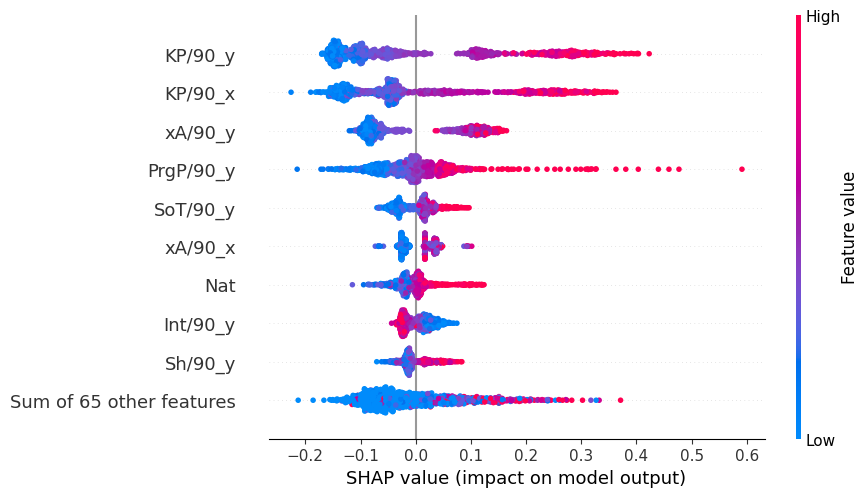

In [20]:
# explain the model's predictions using SHAP
explainer = shap.Explainer(xgb)
shap_values = explainer(mid_21_22_scaled)

# visualize the feature importance based on SHAP
shap.plots.beeswarm(shap_values, max_display=10, show=False)

pl.savefig("shap_summary_mid.png",dpi=700)

In [21]:
#make predictions on KPI for 2023 season
predictions = xgb.predict(mid_21_22_scaled)

## Defenders

In [22]:
#just for defenders
X = def_20_21
y = target_df

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

new_X_train = X_train.drop(['UID','Player','Club'], axis = 1)
new_X_test = X_test.drop(['UID','Player','Club'], axis = 1)
new_y_train = y_train.drop(['UID','Player'], axis = 1)
new_y_test = y_test.drop(['UID','Player'], axis = 1)

In [23]:
# Create the target encoder
target_encoder = ce.TargetEncoder()

# Encode object columns using target encoding
enc_x_train = target_encoder.fit_transform(new_X_train, new_y_train)
enc_x_test = target_encoder.transform(new_X_test)

In [24]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(enc_x_train), columns=enc_x_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(enc_x_test), columns=enc_x_test.columns)

# Define the hyperparameter grid
param_grid = {
    'learning_rate': [.005,0.01,0.05],
    'early_stopping_rounds': [10],
    'max_depth': [2,3,5]
}

# Create the XGBoost model object
xgb_model = XGBRegressor()

# Create the GridSearchCV object
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_scaled, new_y_train,eval_set=[(X_train_scaled, new_y_train), (X_test_scaled, new_y_test)])

# Print the best set of hyperparameters and the corresponding score
print("Best set of hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

[0]	validation_0-rmse:0.49367	validation_1-rmse:0.49039
[1]	validation_0-rmse:0.49296	validation_1-rmse:0.48980
[2]	validation_0-rmse:0.49224	validation_1-rmse:0.48921
[3]	validation_0-rmse:0.49152	validation_1-rmse:0.48863
[4]	validation_0-rmse:0.49082	validation_1-rmse:0.48805
[5]	validation_0-rmse:0.49011	validation_1-rmse:0.48748
[6]	validation_0-rmse:0.48943	validation_1-rmse:0.48692
[7]	validation_0-rmse:0.48873	validation_1-rmse:0.48635
[8]	validation_0-rmse:0.48803	validation_1-rmse:0.48580
[9]	validation_0-rmse:0.48736	validation_1-rmse:0.48525
[10]	validation_0-rmse:0.48668	validation_1-rmse:0.48470
[11]	validation_0-rmse:0.48602	validation_1-rmse:0.48416
[12]	validation_0-rmse:0.48535	validation_1-rmse:0.48362
[13]	validation_0-rmse:0.48470	validation_1-rmse:0.48309
[14]	validation_0-rmse:0.48404	validation_1-rmse:0.48256
[15]	validation_0-rmse:0.48341	validation_1-rmse:0.48204
[16]	validation_0-rmse:0.48276	validation_1-rmse:0.48152
[17]	validation_0-rmse:0.48213	validation

[45]	validation_0-rmse:0.46609	validation_1-rmse:0.46831
[46]	validation_0-rmse:0.46557	validation_1-rmse:0.46781
[47]	validation_0-rmse:0.46505	validation_1-rmse:0.46737
[48]	validation_0-rmse:0.46456	validation_1-rmse:0.46698
[49]	validation_0-rmse:0.46405	validation_1-rmse:0.46649
[50]	validation_0-rmse:0.46356	validation_1-rmse:0.46603
[51]	validation_0-rmse:0.46306	validation_1-rmse:0.46560
[52]	validation_0-rmse:0.46256	validation_1-rmse:0.46521
[53]	validation_0-rmse:0.46207	validation_1-rmse:0.46474
[54]	validation_0-rmse:0.46160	validation_1-rmse:0.46437
[55]	validation_0-rmse:0.46112	validation_1-rmse:0.46393
[56]	validation_0-rmse:0.46063	validation_1-rmse:0.46346
[57]	validation_0-rmse:0.46015	validation_1-rmse:0.46299
[58]	validation_0-rmse:0.45966	validation_1-rmse:0.46256
[59]	validation_0-rmse:0.45919	validation_1-rmse:0.46210
[60]	validation_0-rmse:0.45872	validation_1-rmse:0.46165
[61]	validation_0-rmse:0.45824	validation_1-rmse:0.46129
[62]	validation_0-rmse:0.45777	

[89]	validation_0-rmse:0.44279	validation_1-rmse:0.45057
[90]	validation_0-rmse:0.44238	validation_1-rmse:0.45023
[91]	validation_0-rmse:0.44195	validation_1-rmse:0.44993
[92]	validation_0-rmse:0.44154	validation_1-rmse:0.44959
[93]	validation_0-rmse:0.44112	validation_1-rmse:0.44930
[94]	validation_0-rmse:0.44072	validation_1-rmse:0.44897
[95]	validation_0-rmse:0.44032	validation_1-rmse:0.44864
[96]	validation_0-rmse:0.43991	validation_1-rmse:0.44835
[97]	validation_0-rmse:0.43951	validation_1-rmse:0.44803
[98]	validation_0-rmse:0.43912	validation_1-rmse:0.44776
[99]	validation_0-rmse:0.43874	validation_1-rmse:0.44744
[0]	validation_0-rmse:0.49339	validation_1-rmse:0.49194
[1]	validation_0-rmse:0.49268	validation_1-rmse:0.49132
[2]	validation_0-rmse:0.49197	validation_1-rmse:0.49070
[3]	validation_0-rmse:0.49127	validation_1-rmse:0.49009
[4]	validation_0-rmse:0.49058	validation_1-rmse:0.48948
[5]	validation_0-rmse:0.48990	validation_1-rmse:0.48889
[6]	validation_0-rmse:0.48922	validat

[34]	validation_0-rmse:0.47352	validation_1-rmse:0.47616
[35]	validation_0-rmse:0.47300	validation_1-rmse:0.47568
[36]	validation_0-rmse:0.47248	validation_1-rmse:0.47522
[37]	validation_0-rmse:0.47195	validation_1-rmse:0.47480
[38]	validation_0-rmse:0.47144	validation_1-rmse:0.47434
[39]	validation_0-rmse:0.47093	validation_1-rmse:0.47385
[40]	validation_0-rmse:0.47042	validation_1-rmse:0.47344
[41]	validation_0-rmse:0.46992	validation_1-rmse:0.47295
[42]	validation_0-rmse:0.46941	validation_1-rmse:0.47255
[43]	validation_0-rmse:0.46892	validation_1-rmse:0.47211
[44]	validation_0-rmse:0.46843	validation_1-rmse:0.47163
[45]	validation_0-rmse:0.46794	validation_1-rmse:0.47120
[46]	validation_0-rmse:0.46745	validation_1-rmse:0.47081
[47]	validation_0-rmse:0.46696	validation_1-rmse:0.47042
[48]	validation_0-rmse:0.46648	validation_1-rmse:0.47000
[49]	validation_0-rmse:0.46601	validation_1-rmse:0.46956
[50]	validation_0-rmse:0.46554	validation_1-rmse:0.46914
[51]	validation_0-rmse:0.46505	

[78]	validation_0-rmse:0.44156	validation_1-rmse:0.45246
[79]	validation_0-rmse:0.44104	validation_1-rmse:0.45217
[80]	validation_0-rmse:0.44053	validation_1-rmse:0.45178
[81]	validation_0-rmse:0.44001	validation_1-rmse:0.45139
[82]	validation_0-rmse:0.43949	validation_1-rmse:0.45100
[83]	validation_0-rmse:0.43900	validation_1-rmse:0.45063
[84]	validation_0-rmse:0.43851	validation_1-rmse:0.45033
[85]	validation_0-rmse:0.43801	validation_1-rmse:0.44999
[86]	validation_0-rmse:0.43752	validation_1-rmse:0.44971
[87]	validation_0-rmse:0.43702	validation_1-rmse:0.44936
[88]	validation_0-rmse:0.43654	validation_1-rmse:0.44899
[89]	validation_0-rmse:0.43606	validation_1-rmse:0.44870
[90]	validation_0-rmse:0.43558	validation_1-rmse:0.44837
[91]	validation_0-rmse:0.43510	validation_1-rmse:0.44805
[92]	validation_0-rmse:0.43462	validation_1-rmse:0.44773
[93]	validation_0-rmse:0.43416	validation_1-rmse:0.44745
[94]	validation_0-rmse:0.43369	validation_1-rmse:0.44713
[95]	validation_0-rmse:0.43321	

[23]	validation_0-rmse:0.47298	validation_1-rmse:0.47724
[24]	validation_0-rmse:0.47217	validation_1-rmse:0.47671
[25]	validation_0-rmse:0.47138	validation_1-rmse:0.47610
[26]	validation_0-rmse:0.47060	validation_1-rmse:0.47559
[27]	validation_0-rmse:0.46982	validation_1-rmse:0.47499
[28]	validation_0-rmse:0.46904	validation_1-rmse:0.47440
[29]	validation_0-rmse:0.46829	validation_1-rmse:0.47392
[30]	validation_0-rmse:0.46753	validation_1-rmse:0.47334
[31]	validation_0-rmse:0.46677	validation_1-rmse:0.47285
[32]	validation_0-rmse:0.46603	validation_1-rmse:0.47233
[33]	validation_0-rmse:0.46528	validation_1-rmse:0.47185
[34]	validation_0-rmse:0.46454	validation_1-rmse:0.47129
[35]	validation_0-rmse:0.46381	validation_1-rmse:0.47073
[36]	validation_0-rmse:0.46309	validation_1-rmse:0.47030
[37]	validation_0-rmse:0.46237	validation_1-rmse:0.46976
[38]	validation_0-rmse:0.46166	validation_1-rmse:0.46930
[39]	validation_0-rmse:0.46096	validation_1-rmse:0.46877
[40]	validation_0-rmse:0.46025	

[67]	validation_0-rmse:0.44650	validation_1-rmse:0.45565
[68]	validation_0-rmse:0.44595	validation_1-rmse:0.45526
[69]	validation_0-rmse:0.44538	validation_1-rmse:0.45480
[70]	validation_0-rmse:0.44482	validation_1-rmse:0.45442
[71]	validation_0-rmse:0.44428	validation_1-rmse:0.45393
[72]	validation_0-rmse:0.44374	validation_1-rmse:0.45352
[73]	validation_0-rmse:0.44320	validation_1-rmse:0.45312
[74]	validation_0-rmse:0.44268	validation_1-rmse:0.45266
[75]	validation_0-rmse:0.44216	validation_1-rmse:0.45234
[76]	validation_0-rmse:0.44162	validation_1-rmse:0.45193
[77]	validation_0-rmse:0.44109	validation_1-rmse:0.45149
[78]	validation_0-rmse:0.44056	validation_1-rmse:0.45110
[79]	validation_0-rmse:0.44004	validation_1-rmse:0.45070
[80]	validation_0-rmse:0.43953	validation_1-rmse:0.45026
[81]	validation_0-rmse:0.43902	validation_1-rmse:0.44987
[82]	validation_0-rmse:0.43850	validation_1-rmse:0.44949
[83]	validation_0-rmse:0.43800	validation_1-rmse:0.44911
[84]	validation_0-rmse:0.43748	

[12]	validation_0-rmse:0.47973	validation_1-rmse:0.48245
[13]	validation_0-rmse:0.47866	validation_1-rmse:0.48181
[14]	validation_0-rmse:0.47759	validation_1-rmse:0.48118
[15]	validation_0-rmse:0.47653	validation_1-rmse:0.48055
[16]	validation_0-rmse:0.47550	validation_1-rmse:0.47994
[17]	validation_0-rmse:0.47444	validation_1-rmse:0.47933
[18]	validation_0-rmse:0.47342	validation_1-rmse:0.47868
[19]	validation_0-rmse:0.47241	validation_1-rmse:0.47807
[20]	validation_0-rmse:0.47137	validation_1-rmse:0.47743
[21]	validation_0-rmse:0.47037	validation_1-rmse:0.47685
[22]	validation_0-rmse:0.46934	validation_1-rmse:0.47628
[23]	validation_0-rmse:0.46835	validation_1-rmse:0.47563
[24]	validation_0-rmse:0.46734	validation_1-rmse:0.47504
[25]	validation_0-rmse:0.46637	validation_1-rmse:0.47446
[26]	validation_0-rmse:0.46537	validation_1-rmse:0.47391
[27]	validation_0-rmse:0.46439	validation_1-rmse:0.47328
[28]	validation_0-rmse:0.46343	validation_1-rmse:0.47272
[29]	validation_0-rmse:0.46243	

[56]	validation_0-rmse:0.43531	validation_1-rmse:0.46127
[57]	validation_0-rmse:0.43442	validation_1-rmse:0.46092
[58]	validation_0-rmse:0.43353	validation_1-rmse:0.46056
[59]	validation_0-rmse:0.43263	validation_1-rmse:0.46022
[60]	validation_0-rmse:0.43180	validation_1-rmse:0.45977
[61]	validation_0-rmse:0.43092	validation_1-rmse:0.45945
[62]	validation_0-rmse:0.43010	validation_1-rmse:0.45900
[63]	validation_0-rmse:0.42922	validation_1-rmse:0.45863
[64]	validation_0-rmse:0.42839	validation_1-rmse:0.45818
[65]	validation_0-rmse:0.42753	validation_1-rmse:0.45778
[66]	validation_0-rmse:0.42669	validation_1-rmse:0.45746
[67]	validation_0-rmse:0.42587	validation_1-rmse:0.45710
[68]	validation_0-rmse:0.42502	validation_1-rmse:0.45676
[69]	validation_0-rmse:0.42421	validation_1-rmse:0.45634
[70]	validation_0-rmse:0.42338	validation_1-rmse:0.45601
[71]	validation_0-rmse:0.42260	validation_1-rmse:0.45565
[72]	validation_0-rmse:0.42180	validation_1-rmse:0.45538
[73]	validation_0-rmse:0.42102	

[0]	validation_0-rmse:0.49293	validation_1-rmse:0.49185
[1]	validation_0-rmse:0.49178	validation_1-rmse:0.49109
[2]	validation_0-rmse:0.49062	validation_1-rmse:0.49038
[3]	validation_0-rmse:0.48948	validation_1-rmse:0.48964
[4]	validation_0-rmse:0.48834	validation_1-rmse:0.48896
[5]	validation_0-rmse:0.48720	validation_1-rmse:0.48827
[6]	validation_0-rmse:0.48608	validation_1-rmse:0.48754
[7]	validation_0-rmse:0.48497	validation_1-rmse:0.48686
[8]	validation_0-rmse:0.48386	validation_1-rmse:0.48612
[9]	validation_0-rmse:0.48277	validation_1-rmse:0.48547
[10]	validation_0-rmse:0.48168	validation_1-rmse:0.48480
[11]	validation_0-rmse:0.48059	validation_1-rmse:0.48409
[12]	validation_0-rmse:0.47954	validation_1-rmse:0.48346
[13]	validation_0-rmse:0.47846	validation_1-rmse:0.48278
[14]	validation_0-rmse:0.47743	validation_1-rmse:0.48216
[15]	validation_0-rmse:0.47638	validation_1-rmse:0.48152
[16]	validation_0-rmse:0.47534	validation_1-rmse:0.48087
[17]	validation_0-rmse:0.47432	validation

[45]	validation_0-rmse:0.44935	validation_1-rmse:0.46838
[46]	validation_0-rmse:0.44847	validation_1-rmse:0.46778
[47]	validation_0-rmse:0.44762	validation_1-rmse:0.46728
[48]	validation_0-rmse:0.44679	validation_1-rmse:0.46681
[49]	validation_0-rmse:0.44596	validation_1-rmse:0.46626
[50]	validation_0-rmse:0.44511	validation_1-rmse:0.46574
[51]	validation_0-rmse:0.44428	validation_1-rmse:0.46529
[52]	validation_0-rmse:0.44343	validation_1-rmse:0.46471
[53]	validation_0-rmse:0.44263	validation_1-rmse:0.46428
[54]	validation_0-rmse:0.44181	validation_1-rmse:0.46383
[55]	validation_0-rmse:0.44099	validation_1-rmse:0.46331
[56]	validation_0-rmse:0.44018	validation_1-rmse:0.46282
[57]	validation_0-rmse:0.43938	validation_1-rmse:0.46234
[58]	validation_0-rmse:0.43855	validation_1-rmse:0.46196
[59]	validation_0-rmse:0.43773	validation_1-rmse:0.46153
[60]	validation_0-rmse:0.43696	validation_1-rmse:0.46111
[61]	validation_0-rmse:0.43618	validation_1-rmse:0.46070
[62]	validation_0-rmse:0.43537	

[89]	validation_0-rmse:0.41873	validation_1-rmse:0.42949
[90]	validation_0-rmse:0.41827	validation_1-rmse:0.42921
[91]	validation_0-rmse:0.41783	validation_1-rmse:0.42885
[92]	validation_0-rmse:0.41735	validation_1-rmse:0.42851
[93]	validation_0-rmse:0.41691	validation_1-rmse:0.42807
[94]	validation_0-rmse:0.41646	validation_1-rmse:0.42771
[95]	validation_0-rmse:0.41603	validation_1-rmse:0.42749
[96]	validation_0-rmse:0.41560	validation_1-rmse:0.42723
[97]	validation_0-rmse:0.41518	validation_1-rmse:0.42688
[98]	validation_0-rmse:0.41473	validation_1-rmse:0.42657
[99]	validation_0-rmse:0.41425	validation_1-rmse:0.42620
[0]	validation_0-rmse:0.49271	validation_1-rmse:0.49038
[1]	validation_0-rmse:0.49127	validation_1-rmse:0.48922
[2]	validation_0-rmse:0.48989	validation_1-rmse:0.48809
[3]	validation_0-rmse:0.48850	validation_1-rmse:0.48697
[4]	validation_0-rmse:0.48714	validation_1-rmse:0.48583
[5]	validation_0-rmse:0.48579	validation_1-rmse:0.48474
[6]	validation_0-rmse:0.48450	validat

[34]	validation_0-rmse:0.45169	validation_1-rmse:0.45752
[35]	validation_0-rmse:0.45074	validation_1-rmse:0.45673
[36]	validation_0-rmse:0.44978	validation_1-rmse:0.45603
[37]	validation_0-rmse:0.44885	validation_1-rmse:0.45526
[38]	validation_0-rmse:0.44792	validation_1-rmse:0.45458
[39]	validation_0-rmse:0.44702	validation_1-rmse:0.45383
[40]	validation_0-rmse:0.44615	validation_1-rmse:0.45311
[41]	validation_0-rmse:0.44525	validation_1-rmse:0.45246
[42]	validation_0-rmse:0.44438	validation_1-rmse:0.45175
[43]	validation_0-rmse:0.44355	validation_1-rmse:0.45115
[44]	validation_0-rmse:0.44271	validation_1-rmse:0.45046
[45]	validation_0-rmse:0.44185	validation_1-rmse:0.44985
[46]	validation_0-rmse:0.44105	validation_1-rmse:0.44919
[47]	validation_0-rmse:0.44021	validation_1-rmse:0.44861
[48]	validation_0-rmse:0.43942	validation_1-rmse:0.44796
[49]	validation_0-rmse:0.43864	validation_1-rmse:0.44741
[50]	validation_0-rmse:0.43787	validation_1-rmse:0.44678
[51]	validation_0-rmse:0.43707	

[78]	validation_0-rmse:0.42309	validation_1-rmse:0.43357
[79]	validation_0-rmse:0.42255	validation_1-rmse:0.43306
[80]	validation_0-rmse:0.42203	validation_1-rmse:0.43263
[81]	validation_0-rmse:0.42152	validation_1-rmse:0.43237
[82]	validation_0-rmse:0.42102	validation_1-rmse:0.43198
[83]	validation_0-rmse:0.42054	validation_1-rmse:0.43161
[84]	validation_0-rmse:0.42004	validation_1-rmse:0.43136
[85]	validation_0-rmse:0.41954	validation_1-rmse:0.43088
[86]	validation_0-rmse:0.41905	validation_1-rmse:0.43048
[87]	validation_0-rmse:0.41857	validation_1-rmse:0.43025
[88]	validation_0-rmse:0.41812	validation_1-rmse:0.42990
[89]	validation_0-rmse:0.41765	validation_1-rmse:0.42954
[90]	validation_0-rmse:0.41719	validation_1-rmse:0.42932
[91]	validation_0-rmse:0.41673	validation_1-rmse:0.42890
[92]	validation_0-rmse:0.41628	validation_1-rmse:0.42858
[93]	validation_0-rmse:0.41583	validation_1-rmse:0.42820
[94]	validation_0-rmse:0.41541	validation_1-rmse:0.42788
[95]	validation_0-rmse:0.41497	

[23]	validation_0-rmse:0.45912	validation_1-rmse:0.46523
[24]	validation_0-rmse:0.45786	validation_1-rmse:0.46424
[25]	validation_0-rmse:0.45662	validation_1-rmse:0.46326
[26]	validation_0-rmse:0.45544	validation_1-rmse:0.46245
[27]	validation_0-rmse:0.45425	validation_1-rmse:0.46163
[28]	validation_0-rmse:0.45306	validation_1-rmse:0.46079
[29]	validation_0-rmse:0.45188	validation_1-rmse:0.45987
[30]	validation_0-rmse:0.45073	validation_1-rmse:0.45920
[31]	validation_0-rmse:0.44958	validation_1-rmse:0.45838
[32]	validation_0-rmse:0.44848	validation_1-rmse:0.45755
[33]	validation_0-rmse:0.44735	validation_1-rmse:0.45669
[34]	validation_0-rmse:0.44622	validation_1-rmse:0.45583
[35]	validation_0-rmse:0.44514	validation_1-rmse:0.45508
[36]	validation_0-rmse:0.44409	validation_1-rmse:0.45443
[37]	validation_0-rmse:0.44304	validation_1-rmse:0.45363
[38]	validation_0-rmse:0.44200	validation_1-rmse:0.45290
[39]	validation_0-rmse:0.44094	validation_1-rmse:0.45210
[40]	validation_0-rmse:0.43992	

[67]	validation_0-rmse:0.41508	validation_1-rmse:0.43463
[68]	validation_0-rmse:0.41428	validation_1-rmse:0.43424
[69]	validation_0-rmse:0.41356	validation_1-rmse:0.43377
[70]	validation_0-rmse:0.41277	validation_1-rmse:0.43329
[71]	validation_0-rmse:0.41199	validation_1-rmse:0.43290
[72]	validation_0-rmse:0.41131	validation_1-rmse:0.43244
[73]	validation_0-rmse:0.41061	validation_1-rmse:0.43207
[74]	validation_0-rmse:0.40985	validation_1-rmse:0.43170
[75]	validation_0-rmse:0.40919	validation_1-rmse:0.43128
[76]	validation_0-rmse:0.40846	validation_1-rmse:0.43086
[77]	validation_0-rmse:0.40779	validation_1-rmse:0.43058
[78]	validation_0-rmse:0.40715	validation_1-rmse:0.43003
[79]	validation_0-rmse:0.40647	validation_1-rmse:0.42965
[80]	validation_0-rmse:0.40584	validation_1-rmse:0.42911
[81]	validation_0-rmse:0.40518	validation_1-rmse:0.42875
[82]	validation_0-rmse:0.40449	validation_1-rmse:0.42843
[83]	validation_0-rmse:0.40389	validation_1-rmse:0.42792
[84]	validation_0-rmse:0.40322	

[12]	validation_0-rmse:0.47333	validation_1-rmse:0.47592
[13]	validation_0-rmse:0.47188	validation_1-rmse:0.47488
[14]	validation_0-rmse:0.47042	validation_1-rmse:0.47377
[15]	validation_0-rmse:0.46900	validation_1-rmse:0.47281
[16]	validation_0-rmse:0.46758	validation_1-rmse:0.47173
[17]	validation_0-rmse:0.46621	validation_1-rmse:0.47081
[18]	validation_0-rmse:0.46484	validation_1-rmse:0.46977
[19]	validation_0-rmse:0.46350	validation_1-rmse:0.46876
[20]	validation_0-rmse:0.46217	validation_1-rmse:0.46775
[21]	validation_0-rmse:0.46086	validation_1-rmse:0.46675
[22]	validation_0-rmse:0.45957	validation_1-rmse:0.46577
[23]	validation_0-rmse:0.45829	validation_1-rmse:0.46475
[24]	validation_0-rmse:0.45705	validation_1-rmse:0.46391
[25]	validation_0-rmse:0.45581	validation_1-rmse:0.46290
[26]	validation_0-rmse:0.45458	validation_1-rmse:0.46192
[27]	validation_0-rmse:0.45338	validation_1-rmse:0.46103
[28]	validation_0-rmse:0.45219	validation_1-rmse:0.46017
[29]	validation_0-rmse:0.45099	

[56]	validation_0-rmse:0.42877	validation_1-rmse:0.44460
[57]	validation_0-rmse:0.42791	validation_1-rmse:0.44411
[58]	validation_0-rmse:0.42708	validation_1-rmse:0.44359
[59]	validation_0-rmse:0.42626	validation_1-rmse:0.44309
[60]	validation_0-rmse:0.42554	validation_1-rmse:0.44272
[61]	validation_0-rmse:0.42473	validation_1-rmse:0.44226
[62]	validation_0-rmse:0.42394	validation_1-rmse:0.44188
[63]	validation_0-rmse:0.42317	validation_1-rmse:0.44141
[64]	validation_0-rmse:0.42244	validation_1-rmse:0.44090
[65]	validation_0-rmse:0.42173	validation_1-rmse:0.44040
[66]	validation_0-rmse:0.42097	validation_1-rmse:0.43999
[67]	validation_0-rmse:0.42020	validation_1-rmse:0.43956
[68]	validation_0-rmse:0.41947	validation_1-rmse:0.43909
[69]	validation_0-rmse:0.41878	validation_1-rmse:0.43866
[70]	validation_0-rmse:0.41808	validation_1-rmse:0.43822
[71]	validation_0-rmse:0.41736	validation_1-rmse:0.43792
[72]	validation_0-rmse:0.41671	validation_1-rmse:0.43747
[73]	validation_0-rmse:0.41604	

[0]	validation_0-rmse:0.49176	validation_1-rmse:0.49018
[1]	validation_0-rmse:0.48943	validation_1-rmse:0.48882
[2]	validation_0-rmse:0.48706	validation_1-rmse:0.48749
[3]	validation_0-rmse:0.48478	validation_1-rmse:0.48617
[4]	validation_0-rmse:0.48251	validation_1-rmse:0.48487
[5]	validation_0-rmse:0.48024	validation_1-rmse:0.48358
[6]	validation_0-rmse:0.47799	validation_1-rmse:0.48240
[7]	validation_0-rmse:0.47582	validation_1-rmse:0.48118
[8]	validation_0-rmse:0.47361	validation_1-rmse:0.47992
[9]	validation_0-rmse:0.47143	validation_1-rmse:0.47886
[10]	validation_0-rmse:0.46931	validation_1-rmse:0.47777
[11]	validation_0-rmse:0.46719	validation_1-rmse:0.47656
[12]	validation_0-rmse:0.46507	validation_1-rmse:0.47557
[13]	validation_0-rmse:0.46298	validation_1-rmse:0.47455
[14]	validation_0-rmse:0.46098	validation_1-rmse:0.47347
[15]	validation_0-rmse:0.45896	validation_1-rmse:0.47238
[16]	validation_0-rmse:0.45691	validation_1-rmse:0.47143
[17]	validation_0-rmse:0.45500	validation

[45]	validation_0-rmse:0.40553	validation_1-rmse:0.44881
[46]	validation_0-rmse:0.40413	validation_1-rmse:0.44827
[47]	validation_0-rmse:0.40269	validation_1-rmse:0.44779
[48]	validation_0-rmse:0.40128	validation_1-rmse:0.44739
[49]	validation_0-rmse:0.39990	validation_1-rmse:0.44698
[50]	validation_0-rmse:0.39859	validation_1-rmse:0.44656
[51]	validation_0-rmse:0.39729	validation_1-rmse:0.44609
[52]	validation_0-rmse:0.39593	validation_1-rmse:0.44558
[53]	validation_0-rmse:0.39457	validation_1-rmse:0.44498
[54]	validation_0-rmse:0.39328	validation_1-rmse:0.44453
[55]	validation_0-rmse:0.39196	validation_1-rmse:0.44414
[56]	validation_0-rmse:0.39064	validation_1-rmse:0.44373
[57]	validation_0-rmse:0.38940	validation_1-rmse:0.44328
[58]	validation_0-rmse:0.38816	validation_1-rmse:0.44292
[59]	validation_0-rmse:0.38690	validation_1-rmse:0.44249
[60]	validation_0-rmse:0.38569	validation_1-rmse:0.44207
[61]	validation_0-rmse:0.38454	validation_1-rmse:0.44167
[62]	validation_0-rmse:0.38336	

[89]	validation_0-rmse:0.36202	validation_1-rmse:0.42693
[90]	validation_0-rmse:0.36111	validation_1-rmse:0.42667
[91]	validation_0-rmse:0.36028	validation_1-rmse:0.42637
[92]	validation_0-rmse:0.35936	validation_1-rmse:0.42597
[93]	validation_0-rmse:0.35847	validation_1-rmse:0.42562
[94]	validation_0-rmse:0.35769	validation_1-rmse:0.42529
[95]	validation_0-rmse:0.35683	validation_1-rmse:0.42498
[96]	validation_0-rmse:0.35587	validation_1-rmse:0.42447
[97]	validation_0-rmse:0.35501	validation_1-rmse:0.42409
[98]	validation_0-rmse:0.35424	validation_1-rmse:0.42384
[99]	validation_0-rmse:0.35334	validation_1-rmse:0.42356
[0]	validation_0-rmse:0.49247	validation_1-rmse:0.49387
[1]	validation_0-rmse:0.49024	validation_1-rmse:0.49268
[2]	validation_0-rmse:0.48801	validation_1-rmse:0.49125
[3]	validation_0-rmse:0.48584	validation_1-rmse:0.49012
[4]	validation_0-rmse:0.48368	validation_1-rmse:0.48878
[5]	validation_0-rmse:0.48156	validation_1-rmse:0.48775
[6]	validation_0-rmse:0.47947	validat

[34]	validation_0-rmse:0.38958	validation_1-rmse:0.41259
[35]	validation_0-rmse:0.38836	validation_1-rmse:0.41216
[36]	validation_0-rmse:0.38720	validation_1-rmse:0.41194
[37]	validation_0-rmse:0.38611	validation_1-rmse:0.41110
[38]	validation_0-rmse:0.38514	validation_1-rmse:0.41094
[39]	validation_0-rmse:0.38419	validation_1-rmse:0.41094
[40]	validation_0-rmse:0.38322	validation_1-rmse:0.41047
[41]	validation_0-rmse:0.38225	validation_1-rmse:0.41052
[42]	validation_0-rmse:0.38135	validation_1-rmse:0.41043
[43]	validation_0-rmse:0.38040	validation_1-rmse:0.41008
[44]	validation_0-rmse:0.37949	validation_1-rmse:0.40947
[45]	validation_0-rmse:0.37866	validation_1-rmse:0.40941
[46]	validation_0-rmse:0.37767	validation_1-rmse:0.40933
[47]	validation_0-rmse:0.37690	validation_1-rmse:0.40946
[48]	validation_0-rmse:0.37622	validation_1-rmse:0.40943
[49]	validation_0-rmse:0.37537	validation_1-rmse:0.40970
[50]	validation_0-rmse:0.37466	validation_1-rmse:0.40984
[51]	validation_0-rmse:0.37382	

[50]	validation_0-rmse:0.37170	validation_1-rmse:0.41655
[51]	validation_0-rmse:0.37116	validation_1-rmse:0.41748
[52]	validation_0-rmse:0.37072	validation_1-rmse:0.41767
[53]	validation_0-rmse:0.37010	validation_1-rmse:0.41801
[54]	validation_0-rmse:0.36966	validation_1-rmse:0.41854
[55]	validation_0-rmse:0.36894	validation_1-rmse:0.41869
[56]	validation_0-rmse:0.36850	validation_1-rmse:0.41786
[57]	validation_0-rmse:0.36832	validation_1-rmse:0.41860
[0]	validation_0-rmse:0.48705	validation_1-rmse:0.48641
[1]	validation_0-rmse:0.48038	validation_1-rmse:0.48079
[2]	validation_0-rmse:0.47424	validation_1-rmse:0.47599
[3]	validation_0-rmse:0.46844	validation_1-rmse:0.47119
[4]	validation_0-rmse:0.46325	validation_1-rmse:0.46639
[5]	validation_0-rmse:0.45827	validation_1-rmse:0.46233
[6]	validation_0-rmse:0.45328	validation_1-rmse:0.45856
[7]	validation_0-rmse:0.44884	validation_1-rmse:0.45406
[8]	validation_0-rmse:0.44454	validation_1-rmse:0.45083
[9]	validation_0-rmse:0.44057	validation

[37]	validation_0-rmse:0.39032	validation_1-rmse:0.41729
[38]	validation_0-rmse:0.38927	validation_1-rmse:0.41717
[39]	validation_0-rmse:0.38836	validation_1-rmse:0.41684
[40]	validation_0-rmse:0.38735	validation_1-rmse:0.41670
[41]	validation_0-rmse:0.38626	validation_1-rmse:0.41660
[42]	validation_0-rmse:0.38554	validation_1-rmse:0.41587
[43]	validation_0-rmse:0.38474	validation_1-rmse:0.41597
[44]	validation_0-rmse:0.38402	validation_1-rmse:0.41571
[45]	validation_0-rmse:0.38308	validation_1-rmse:0.41506
[46]	validation_0-rmse:0.38228	validation_1-rmse:0.41503
[47]	validation_0-rmse:0.38166	validation_1-rmse:0.41510
[48]	validation_0-rmse:0.38088	validation_1-rmse:0.41508
[49]	validation_0-rmse:0.38022	validation_1-rmse:0.41489
[50]	validation_0-rmse:0.37945	validation_1-rmse:0.41437
[51]	validation_0-rmse:0.37875	validation_1-rmse:0.41451
[52]	validation_0-rmse:0.37807	validation_1-rmse:0.41430
[53]	validation_0-rmse:0.37757	validation_1-rmse:0.41426
[54]	validation_0-rmse:0.37675	

[16]	validation_0-rmse:0.40239	validation_1-rmse:0.42714
[17]	validation_0-rmse:0.39948	validation_1-rmse:0.42535
[18]	validation_0-rmse:0.39632	validation_1-rmse:0.42397
[19]	validation_0-rmse:0.39355	validation_1-rmse:0.42255
[20]	validation_0-rmse:0.39084	validation_1-rmse:0.42111
[21]	validation_0-rmse:0.38829	validation_1-rmse:0.41977
[22]	validation_0-rmse:0.38586	validation_1-rmse:0.41897
[23]	validation_0-rmse:0.38378	validation_1-rmse:0.41867
[24]	validation_0-rmse:0.38172	validation_1-rmse:0.41768
[25]	validation_0-rmse:0.37955	validation_1-rmse:0.41680
[26]	validation_0-rmse:0.37743	validation_1-rmse:0.41658
[27]	validation_0-rmse:0.37563	validation_1-rmse:0.41594
[28]	validation_0-rmse:0.37386	validation_1-rmse:0.41498
[29]	validation_0-rmse:0.37227	validation_1-rmse:0.41480
[30]	validation_0-rmse:0.37082	validation_1-rmse:0.41438
[31]	validation_0-rmse:0.36923	validation_1-rmse:0.41359
[32]	validation_0-rmse:0.36757	validation_1-rmse:0.41353
[33]	validation_0-rmse:0.36608	

[52]	validation_0-rmse:0.34635	validation_1-rmse:0.41015
[53]	validation_0-rmse:0.34542	validation_1-rmse:0.41045
[54]	validation_0-rmse:0.34453	validation_1-rmse:0.41036
[0]	validation_0-rmse:0.48656	validation_1-rmse:0.48825
[1]	validation_0-rmse:0.47887	validation_1-rmse:0.48213
[2]	validation_0-rmse:0.47180	validation_1-rmse:0.47662
[3]	validation_0-rmse:0.46529	validation_1-rmse:0.47099
[4]	validation_0-rmse:0.45922	validation_1-rmse:0.46612
[5]	validation_0-rmse:0.45366	validation_1-rmse:0.46208
[6]	validation_0-rmse:0.44846	validation_1-rmse:0.45804
[7]	validation_0-rmse:0.44336	validation_1-rmse:0.45373
[8]	validation_0-rmse:0.43884	validation_1-rmse:0.45104
[9]	validation_0-rmse:0.43421	validation_1-rmse:0.44796
[10]	validation_0-rmse:0.42975	validation_1-rmse:0.44490
[11]	validation_0-rmse:0.42556	validation_1-rmse:0.44209
[12]	validation_0-rmse:0.42151	validation_1-rmse:0.44008
[13]	validation_0-rmse:0.41805	validation_1-rmse:0.43767
[14]	validation_0-rmse:0.41467	validation

[29]	validation_0-rmse:0.31360	validation_1-rmse:0.42329
[30]	validation_0-rmse:0.31053	validation_1-rmse:0.42241
[31]	validation_0-rmse:0.30806	validation_1-rmse:0.42309
[32]	validation_0-rmse:0.30546	validation_1-rmse:0.42254
[33]	validation_0-rmse:0.30292	validation_1-rmse:0.42203
[34]	validation_0-rmse:0.30075	validation_1-rmse:0.42228
[35]	validation_0-rmse:0.29830	validation_1-rmse:0.42199
[36]	validation_0-rmse:0.29636	validation_1-rmse:0.42188
[37]	validation_0-rmse:0.29448	validation_1-rmse:0.42218
[38]	validation_0-rmse:0.29264	validation_1-rmse:0.42250
[39]	validation_0-rmse:0.29055	validation_1-rmse:0.42319
[40]	validation_0-rmse:0.28898	validation_1-rmse:0.42332
[41]	validation_0-rmse:0.28745	validation_1-rmse:0.42330
[42]	validation_0-rmse:0.28594	validation_1-rmse:0.42341
[43]	validation_0-rmse:0.28394	validation_1-rmse:0.42348
[44]	validation_0-rmse:0.28265	validation_1-rmse:0.42361
[45]	validation_0-rmse:0.28127	validation_1-rmse:0.42362
[46]	validation_0-rmse:0.27985	

[30]	validation_0-rmse:0.32386	validation_1-rmse:0.42068
[31]	validation_0-rmse:0.32141	validation_1-rmse:0.42069
[32]	validation_0-rmse:0.31913	validation_1-rmse:0.42025
[33]	validation_0-rmse:0.31739	validation_1-rmse:0.41942
[34]	validation_0-rmse:0.31511	validation_1-rmse:0.41895
[35]	validation_0-rmse:0.31323	validation_1-rmse:0.41908
[36]	validation_0-rmse:0.31127	validation_1-rmse:0.41884
[37]	validation_0-rmse:0.30953	validation_1-rmse:0.41847
[38]	validation_0-rmse:0.30740	validation_1-rmse:0.41849
[39]	validation_0-rmse:0.30576	validation_1-rmse:0.41859
[40]	validation_0-rmse:0.30413	validation_1-rmse:0.41907
[41]	validation_0-rmse:0.30252	validation_1-rmse:0.41871
[42]	validation_0-rmse:0.30076	validation_1-rmse:0.41814
[43]	validation_0-rmse:0.29877	validation_1-rmse:0.41814
[44]	validation_0-rmse:0.29739	validation_1-rmse:0.41798
[45]	validation_0-rmse:0.29596	validation_1-rmse:0.41810
[46]	validation_0-rmse:0.29423	validation_1-rmse:0.41821
[47]	validation_0-rmse:0.29258	

In [25]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(enc_x_train), columns=enc_x_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(enc_x_test), columns=enc_x_test.columns)

# List of models to try
models = [
    LinearRegression(),
    Ridge(),
    XGBRegressor(**grid_search.best_params_),
    SVR()
]

# Dictionary to store MSE values
mse_dict = {'Model': [], 'MSE': []}

# Train and evaluate each model
for model in models:
    model_name = model.__class__.__name__

    if model_name == 'XGBRegressor':
        model.fit(X_train_scaled, new_y_train, eval_set=[(X_train_scaled, new_y_train), (X_test_scaled, new_y_test)])
    
    else:
        # Train the model
        model.fit(X_train_scaled, new_y_train.values.ravel())

    # Make predictions
    predictions = model.predict(X_test_scaled)

    # Evaluate the model
    mse = mean_squared_error(new_y_test, predictions)
    mse_dict['Model'].append(model_name)
    mse_dict['MSE'].append(mse)
    print(f'{model_name} Mean Squared Error: {mse}')

# Create a DataFrame from the MSE dictionary
mse_df = pd.DataFrame(mse_dict)
mse_df

LinearRegression Mean Squared Error: 0.17215503787359823
Ridge Mean Squared Error: 0.17137833285367055
[0]	validation_0-rmse:0.48541	validation_1-rmse:0.48581
[1]	validation_0-rmse:0.47718	validation_1-rmse:0.47941
[2]	validation_0-rmse:0.46962	validation_1-rmse:0.47359
[3]	validation_0-rmse:0.46255	validation_1-rmse:0.46826
[4]	validation_0-rmse:0.45605	validation_1-rmse:0.46269
[5]	validation_0-rmse:0.45001	validation_1-rmse:0.45814
[6]	validation_0-rmse:0.44413	validation_1-rmse:0.45477
[7]	validation_0-rmse:0.43889	validation_1-rmse:0.45079
[8]	validation_0-rmse:0.43382	validation_1-rmse:0.44751
[9]	validation_0-rmse:0.42920	validation_1-rmse:0.44314
[10]	validation_0-rmse:0.42494	validation_1-rmse:0.44039
[11]	validation_0-rmse:0.42068	validation_1-rmse:0.43766
[12]	validation_0-rmse:0.41647	validation_1-rmse:0.43521
[13]	validation_0-rmse:0.41246	validation_1-rmse:0.43299
[14]	validation_0-rmse:0.40893	validation_1-rmse:0.43104
[15]	validation_0-rmse:0.40547	validation_1-rmse:0.4

,Model,MSE
0,LinearRegression,0.172155
1,Ridge,0.171378
2,XGBRegressor,0.168515
3,SVR,0.186831


In [26]:
np.var(new_y_test)

TklW/90    0.240184
dtype: float64

In [27]:
#drop identifier features
new_X = X.drop(['Player','UID','Club'], axis=1)
new_y = y.drop(['UID','Player'], axis=1)
new_def_21_22 = def_21_22.drop(['Player','UID','Club'], axis=1)

# Encode object columns using target encoding
enc_X = target_encoder.fit_transform(new_X, new_y)
enc_def_21_22 = target_encoder.transform(new_def_21_22)

#scale data
X_scaled = pd.DataFrame(scaler.fit_transform(enc_X), columns=enc_X.columns)
def_21_22_scaled = pd.DataFrame(scaler.transform(enc_def_21_22), columns=enc_def_21_22.columns)

#fit to best model
xgb = XGBRegressor(**grid_search.best_params_)
xgb.fit(X_train_scaled, new_y_train.values.ravel(), eval_set=[(X_train_scaled, new_y_train), (X_test_scaled, new_y_test)])

[0]	validation_0-rmse:0.48541	validation_1-rmse:0.48581
[1]	validation_0-rmse:0.47718	validation_1-rmse:0.47941
[2]	validation_0-rmse:0.46962	validation_1-rmse:0.47359
[3]	validation_0-rmse:0.46255	validation_1-rmse:0.46826
[4]	validation_0-rmse:0.45605	validation_1-rmse:0.46269
[5]	validation_0-rmse:0.45001	validation_1-rmse:0.45814
[6]	validation_0-rmse:0.44413	validation_1-rmse:0.45477
[7]	validation_0-rmse:0.43889	validation_1-rmse:0.45079
[8]	validation_0-rmse:0.43382	validation_1-rmse:0.44751
[9]	validation_0-rmse:0.42920	validation_1-rmse:0.44314
[10]	validation_0-rmse:0.42494	validation_1-rmse:0.44039
[11]	validation_0-rmse:0.42068	validation_1-rmse:0.43766
[12]	validation_0-rmse:0.41647	validation_1-rmse:0.43521
[13]	validation_0-rmse:0.41246	validation_1-rmse:0.43299
[14]	validation_0-rmse:0.40893	validation_1-rmse:0.43104
[15]	validation_0-rmse:0.40547	validation_1-rmse:0.42954
[16]	validation_0-rmse:0.40208	validation_1-rmse:0.42769
[17]	validation_0-rmse:0.39907	validation

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=10,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

[15:05:34] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


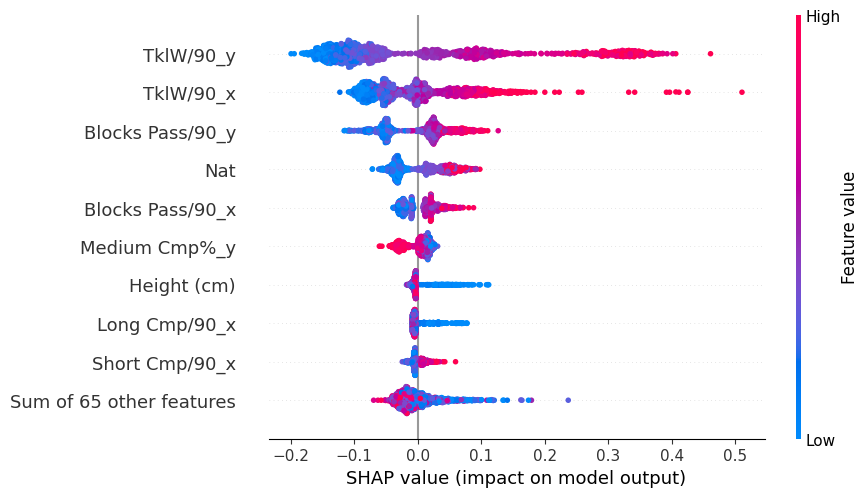

In [28]:
# explain the model's predictions using SHAP
explainer = shap.Explainer(xgb)
shap_values = explainer(def_21_22_scaled)

# visualize the feature importance based on SHAP
shap.plots.beeswarm(shap_values, max_display=10, show=False)

pl.savefig("shap_summary_def.png",dpi=700)

In [29]:
#make predictions on KPI for 2023 season
predictions = xgb.predict(def_21_22_scaled)

In [30]:
def_21_22['Nat_num'] = def_21_22_scaled['Nat']
def_21_22 = def_21_22.sort_values('Nat_num', ascending=False)
def_21_22['Nat'].unique()

array(['PHI', 'ARG', 'BEL', 'NED', 'MAD', 'UKR', 'ALG', 'COM', 'SUR',
       'TUN', 'BUL', 'NAM', 'TUR', 'URU', 'MEX', 'SEN', 'HAI', 'GAB',
       'GER', 'BFA', 'JPN', 'GUM', 'POR', 'CRO', 'CIV', 'POL', 'CMR',
       'COL', 'ESP', 'CZE', 'ALB', 'COD', 'MTQ', 'PER', 'MAR', 'HUN',
       'CUW', 'GRE', 'CRC', 'SVK', 'BEN', 'ATG', 'UGA', 'MNE', 'MLI',
       'NGA', 'AUS', 'ECU', 'ANG', 'GUF', 'SUI', 'NZL', 'SWE', 'LUX',
       'GUI', 'SLE', 'NOR', 'FRA', 'CHI', 'GAM', 'CYP', 'CGO', 'GHA',
       'HON', 'VEN', 'IRL', 'GLP', 'FIN', 'BIH', 'PUR', 'CAN', 'KOS',
       'WAL', 'SRB', 'BRA', 'AUT', 'PAR', 'JAM', 'MOZ', 'DEN', 'SCO',
       'NIR', 'ENG', 'SVN', 'ITA', 'USA', 'SLV'], dtype=object)

In [31]:
mid_21_22['Nat_num'] = mid_21_22_scaled['Nat']
mid_21_22 = mid_21_22.sort_values('Nat_num', ascending=False)
mid_21_22['Nat'].unique()

array(['URU', 'IRN', 'MAR', 'ISR', 'TUR', 'ARM', 'UKR', 'BEL', 'POL',
       'NED', 'CPV', 'ARG', 'IRQ', 'HON', 'SWE', 'NIR', 'SKN', 'NOR',
       'ALG', 'ESP', 'ITA', 'LIE', 'PER', 'POR', 'DEN', 'MEX', 'GUI',
       'ISL', 'CHI', 'KOS', 'AUS', 'GER', 'BIH', 'AUT', 'ROU', 'SVN',
       'JPN', 'JAM', 'HUN', 'ZIM', 'CUW', 'SRB', 'CRO', 'SVK', 'ALB',
       'FIN', 'KEN', 'SLV', 'WAL', 'GEO', 'PAR', 'COM', 'COD', 'CYP',
       'PAN', 'CRC', 'ENG', 'TUN', 'MAD', 'SUI', 'SCO', 'BRA', 'VEN',
       'IRL', 'CAN', 'CIV', 'FRA', 'GRE', 'ECU', 'NGA', 'CMR', 'CZE',
       'CTA', 'GAB', 'BUL', 'COL', 'GHA', 'MLI', 'MTQ', 'CUB', 'EGY',
       'USA', 'SEN'], dtype=object)

In [32]:
att_21_22['Nat_num'] = att_21_22_scaled['Nat']
att_21_22 = att_21_22.sort_values('Nat_num', ascending=False)
att_21_22['Nat'].unique()

KeyError: 'Nat'

In [ ]:
att_21_22[att_21_22['Nat']=='GUI']